In [1]:
import sys
import yaml
import os
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from PIL import Image
sys.path.append(os.path.abspath(".."))

In [2]:
# Импортируем функцию для определения корня проекта
sys.path.append(os.path.abspath("../scripts"))
from auxiliary_functions import get_project_root

# Добавляем корень проекта в sys.path
sys.path.append(get_project_root())

from scripts.auxiliary_functions import get_project_paths
from scripts.auxiliary_functions import plot_training_results
from scripts.auxiliary_functions import plot_matrix, plot_grouped_by_param

In [3]:
project_root = get_project_root()
params_path = os.path.join(project_root, "params.yaml")

with open(params_path, "r") as f:
    params = yaml.safe_load(f)
    paths = get_project_paths()

# Тестирование разных аугментаций чреез Optuna

Вот параметры для тестирования


    rotation = trial.suggest_int("rotation", 0, 10)
    translate = trial.suggest_float("translate", 0.0, 0.2)
    scale_min = trial.suggest_float("scale_min", 0.8, 1.0)
    scale_max = trial.suggest_float("scale_max", 1.0, 1.2)
    use_color_jitter = trial.suggest_categorical("color_jitter", [True, False])
    erasing_p = trial.suggest_float("random_erasing_p", 0.0, 0.4)

    transform_list = [
        transforms.RandomResizedCrop(64, scale=(scale_min, scale_max)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(rotation),
        transforms.RandomAffine(degrees=0, translate=(translate, translate), scale=(scale_min, scale_max)),
    ]

    if use_color_jitter:
        transform_list.append(transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2))

    transform_list.extend([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    if erasing_p > 0.0:
        transform_list.append(transforms.RandomErasing(p=erasing_p, scale=(0.02, 0.1), ratio=(0.3, 3.3), value=0))



In [22]:
mlflow_runs_df = pd.read_csv(paths['raw_dir']/"runs_aug.csv")
mlflow_runs_df = mlflow_runs_df.drop(columns=[
    'Start Time',
    'Source Type',
    'Status',
    'Duration',
    'Run ID',
    'Name',
    'Source Name',
    'User',
    'early_stopping_patience',
    'val_split',
    'num_epochs',
    'optuna'
])


In [23]:
mlflow_runs_df

color_jitter       model_name_tag  random_erasing_p  rotation  scale_max  \
0           True  optuna_aug_trial_89          0.337331         2   1.016675   
1           True  optuna_aug_trial_88          0.021177        10   1.028587   
2           True  optuna_aug_trial_87          0.026543        10   1.029482   
3          False  optuna_aug_trial_86          0.210781         1   1.047080   
4           True  optuna_aug_trial_85          0.041280         2   1.036479   
..           ...                  ...               ...       ...        ...   
85          True   optuna_aug_trial_4          0.030837         2   1.107724   
86          True   optuna_aug_trial_3          0.320105         9   1.048560   
87         False   optuna_aug_trial_2          0.132420         3   1.021050   
88         False   optuna_aug_trial_1          0.129371         9   1.073604   
89          True   optuna_aug_trial_0          0.267512         1   1.015030   

    scale_min  translate  accuracy  train_loss  val_loss  
0    0.926904   0.050960  0.757812    0.007914  0.007967  
1    0.912410   0.132696  0.839844    0.016366  0.034352  
2    0.928318   0.134474  0.875000    0.007265  0.006077  
3    0.966554   0.025338  0.718750    0.000466  0.001491  
4    0.870971   0.035428  0.855469    0.016356  0.007782  
..        ...        ...       ...         ...       ...  
85   0.805462   0.083953  0.824219    0.014937  0.006637  
86   0.964626   0.183586  0.753906    0.021927  0.017628  
87   0.999051   0.028915  0.839844    0.001137  0.013142  
88   0.895069   0.076739  0.730469    0.027472  0.020006  
89   0.939544   0.107656  0.859375    0.005367  0.010320  

[90 rows x 10 columns]

In [25]:
mlflow_runs_df.describe()

random_erasing_p   rotation  scale_max  scale_min  translate  \
count         90.000000  90.000000  90.000000  90.000000  90.000000   
mean           0.166019   5.588889   1.053509   0.923064   0.090472   
std            0.113218   3.401568   0.039876   0.047142   0.042869   
min            0.001405   0.000000   1.000411   0.804436   0.000571   
25%            0.068827   2.000000   1.027190   0.887072   0.060721   
50%            0.135608   6.000000   1.046627   0.933161   0.089405   
75%            0.265717   9.000000   1.067258   0.961086   0.117576   
max            0.396632  10.000000   1.198255   0.999051   0.195541   

        accuracy  train_loss   val_loss  
count  90.000000   90.000000  90.000000  
mean    0.820009    0.012803   0.019370  
std     0.042840    0.011407   0.018251  
min     0.660156    0.000466   0.001103  
25%     0.801758    0.005169   0.005591  
50%     0.828125    0.010343   0.013238  
75%     0.851562    0.016156   0.027953  
max     0.894531    0.067972   0.085926

In [28]:
top_10 = mlflow_runs_df.sort_values(by='accuracy', ascending=False).head(10)


# ВНИМАНИЕ. СЕТ был про классификацию лошадей/людей. Собаки/кошки на графике - ошибочные подписи! CAt = Лошадь, Dog = Человек

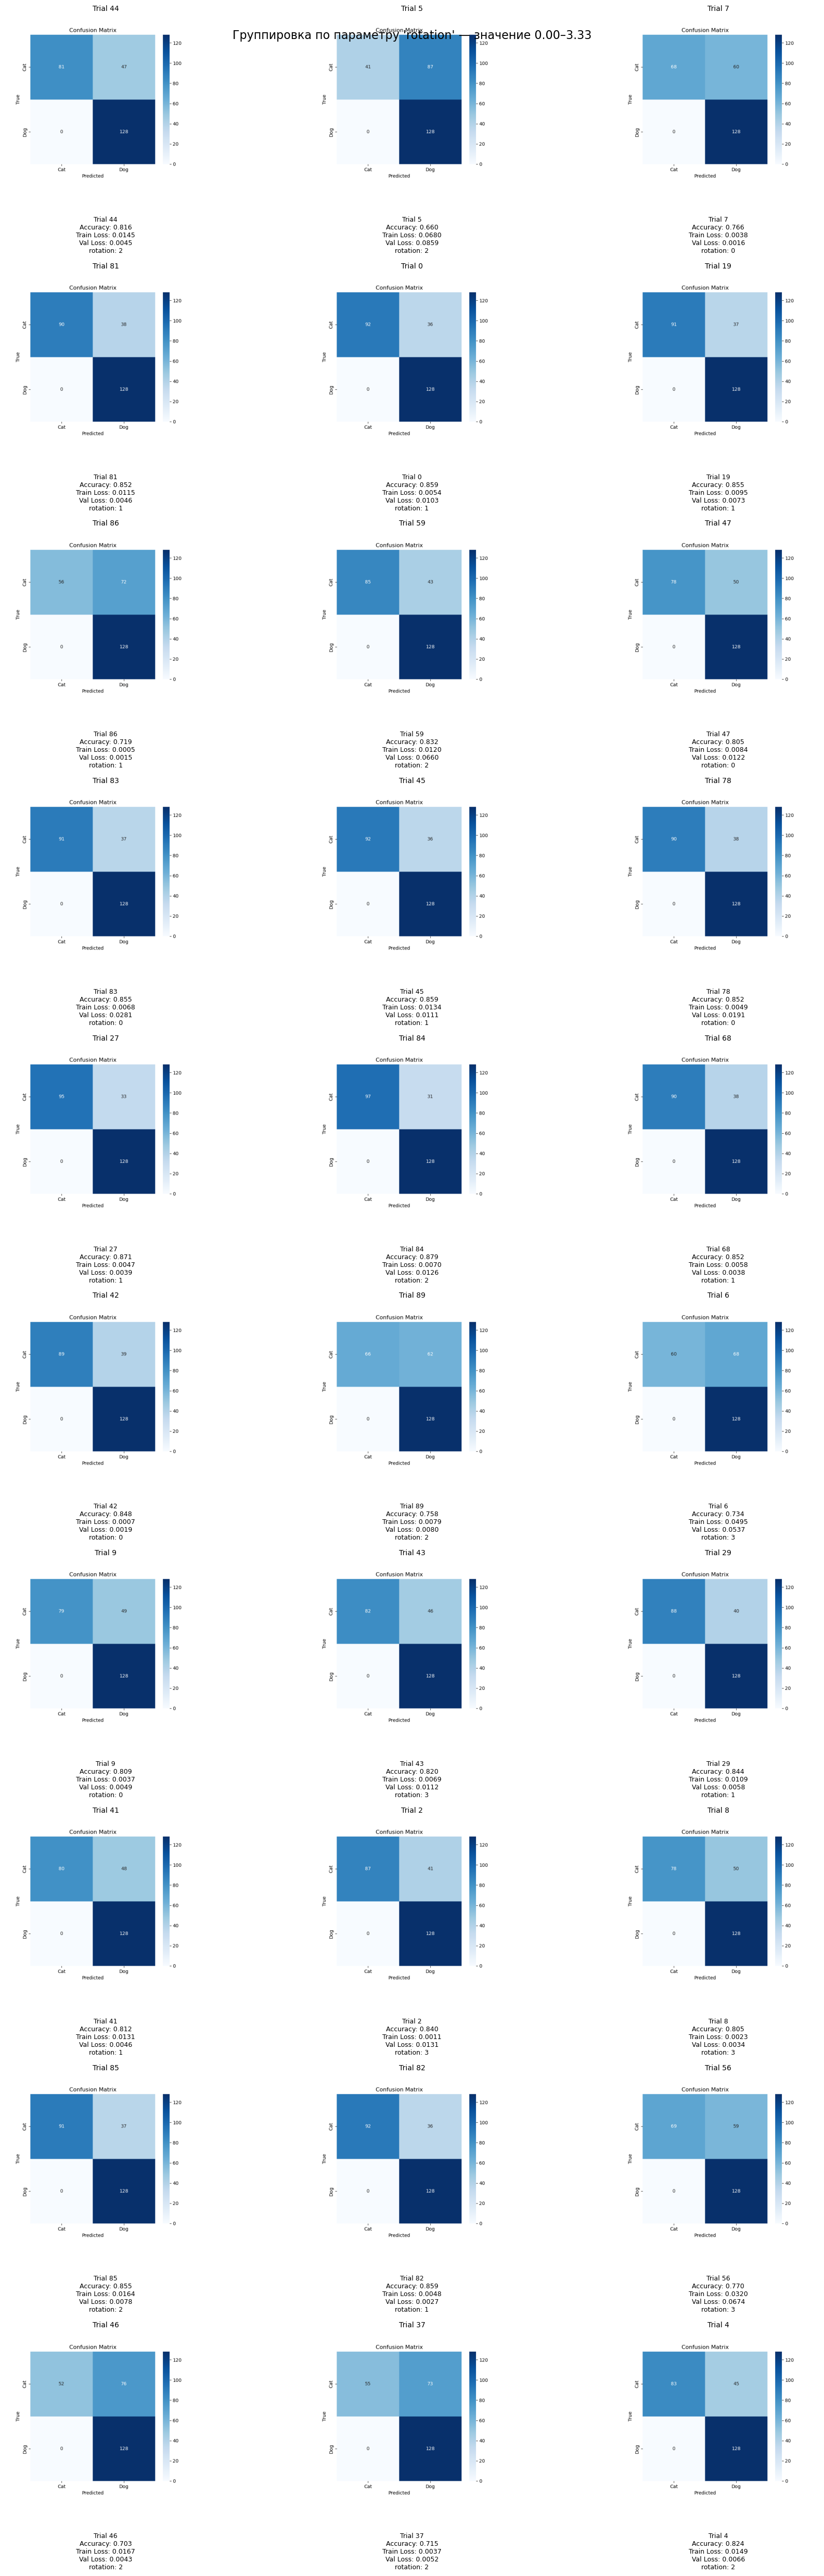

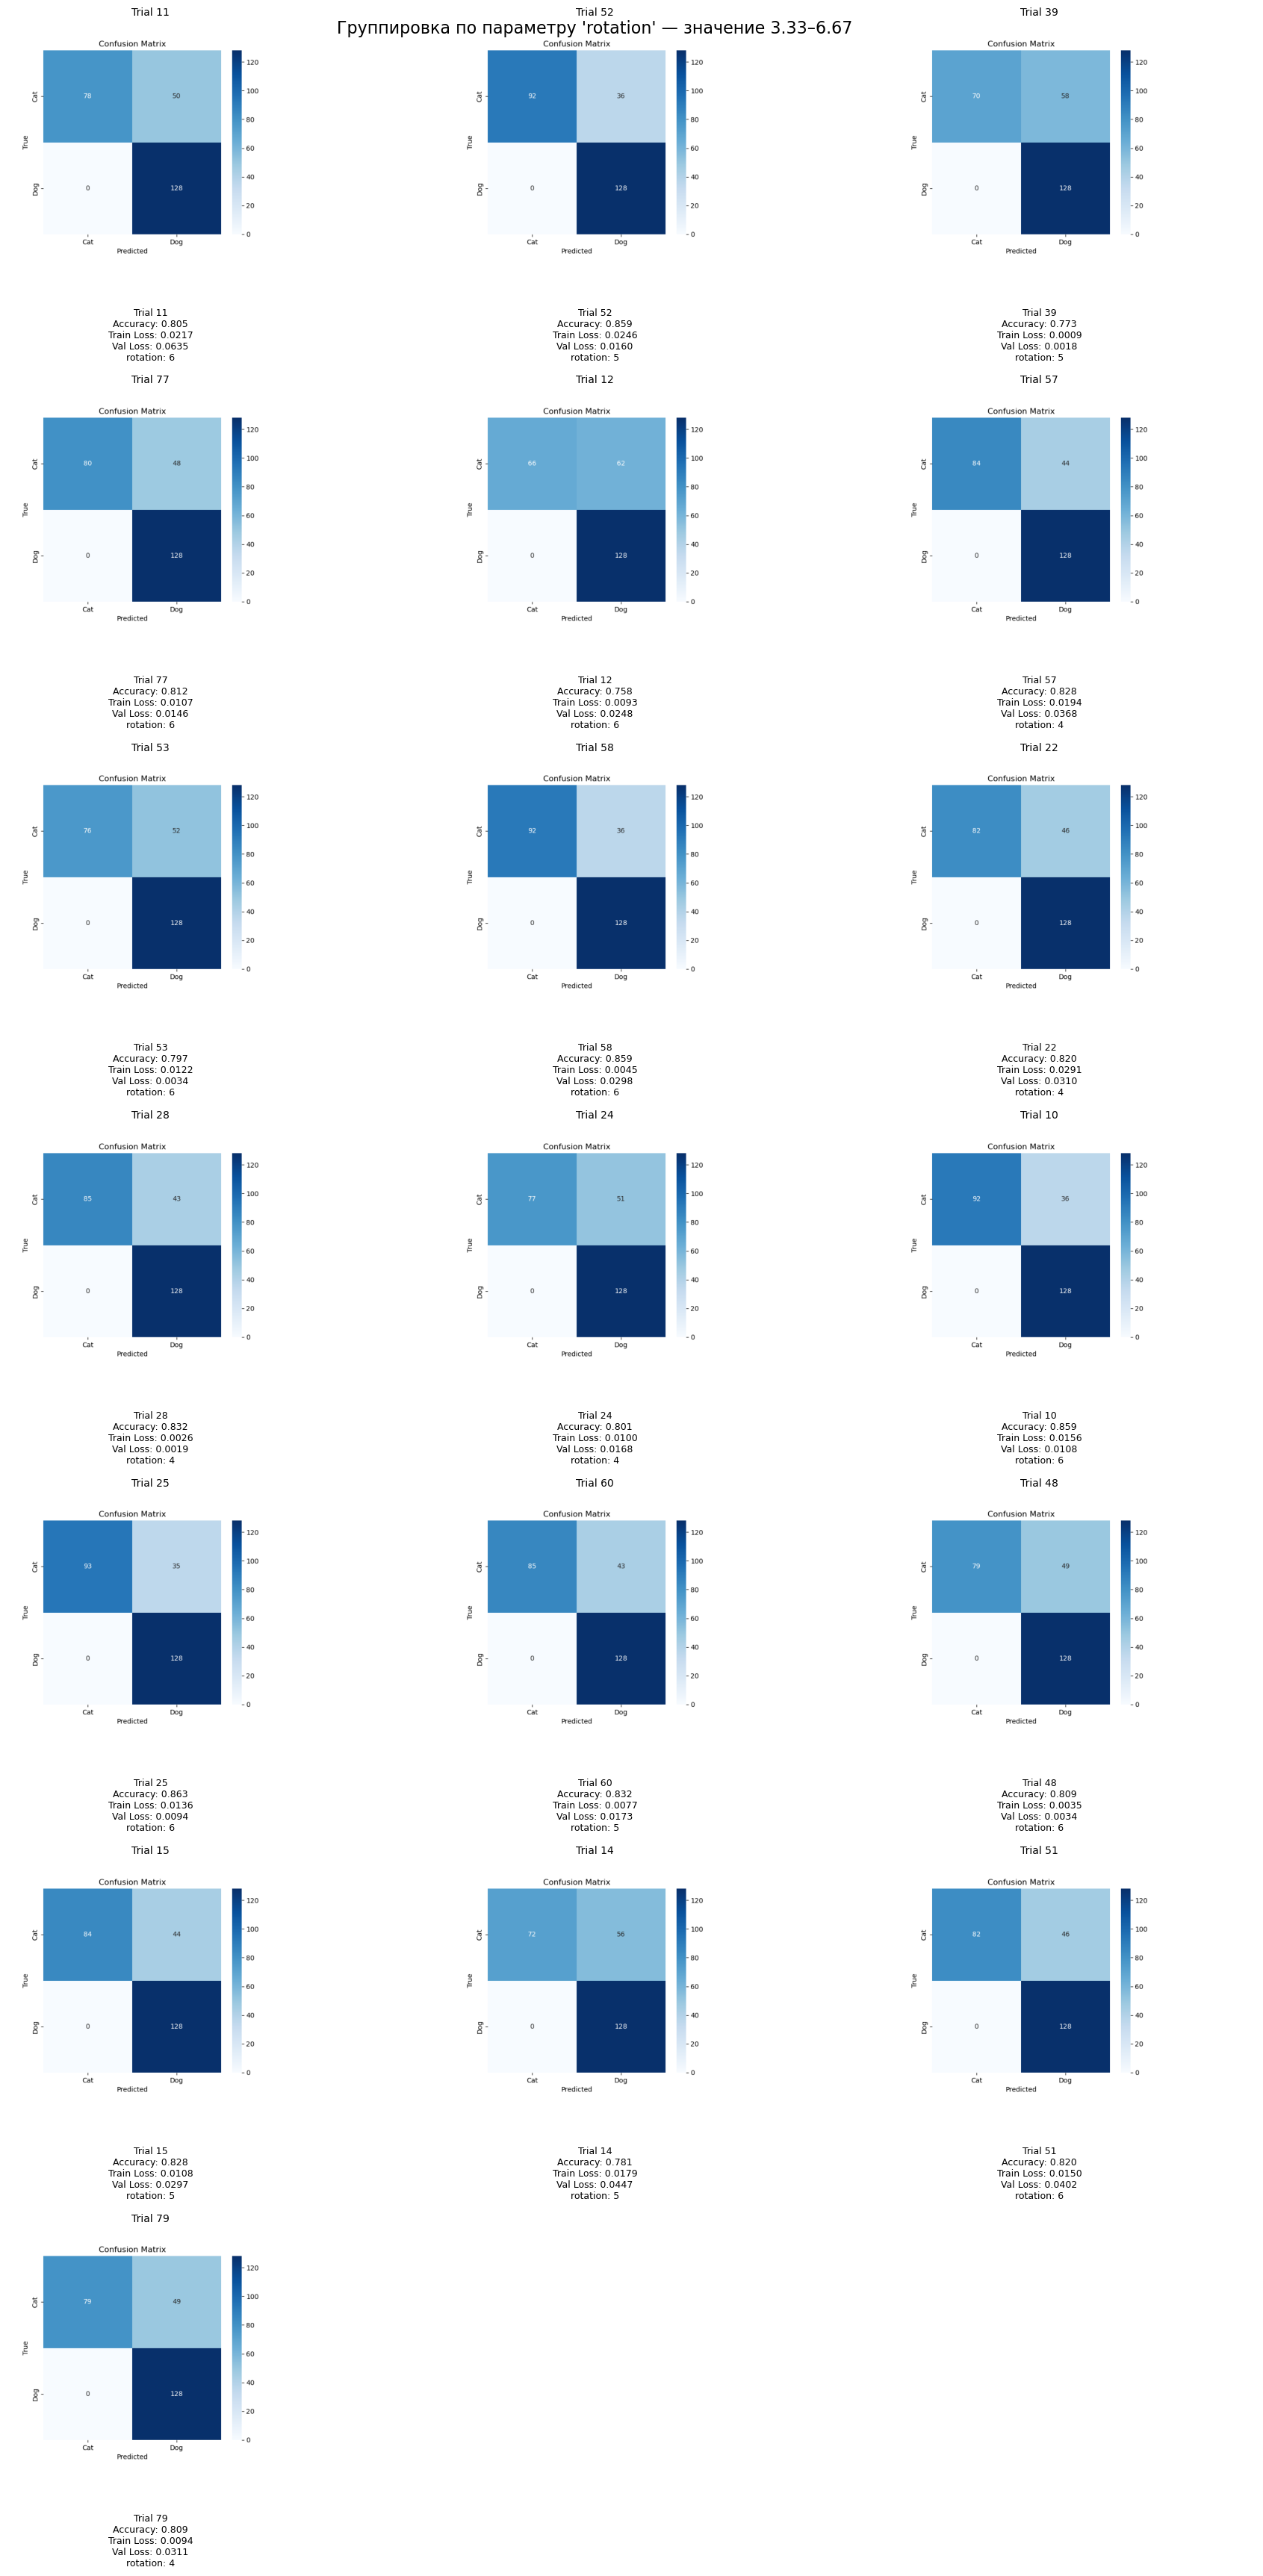

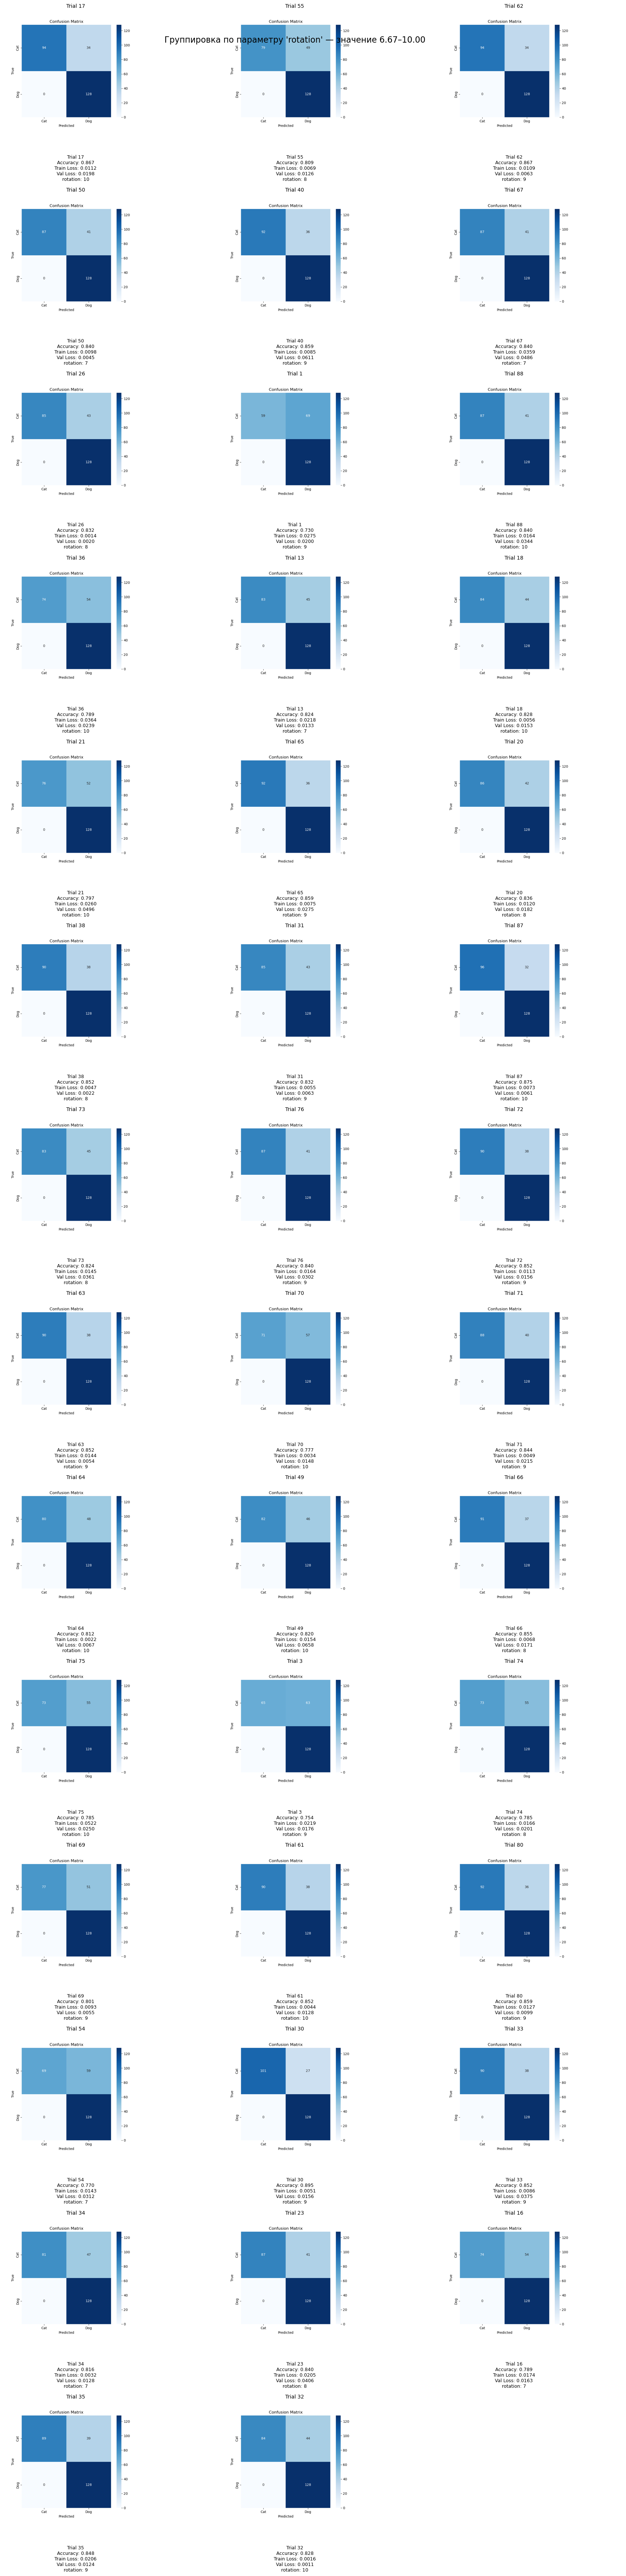

In [7]:
plot_grouped_by_param("rotation")


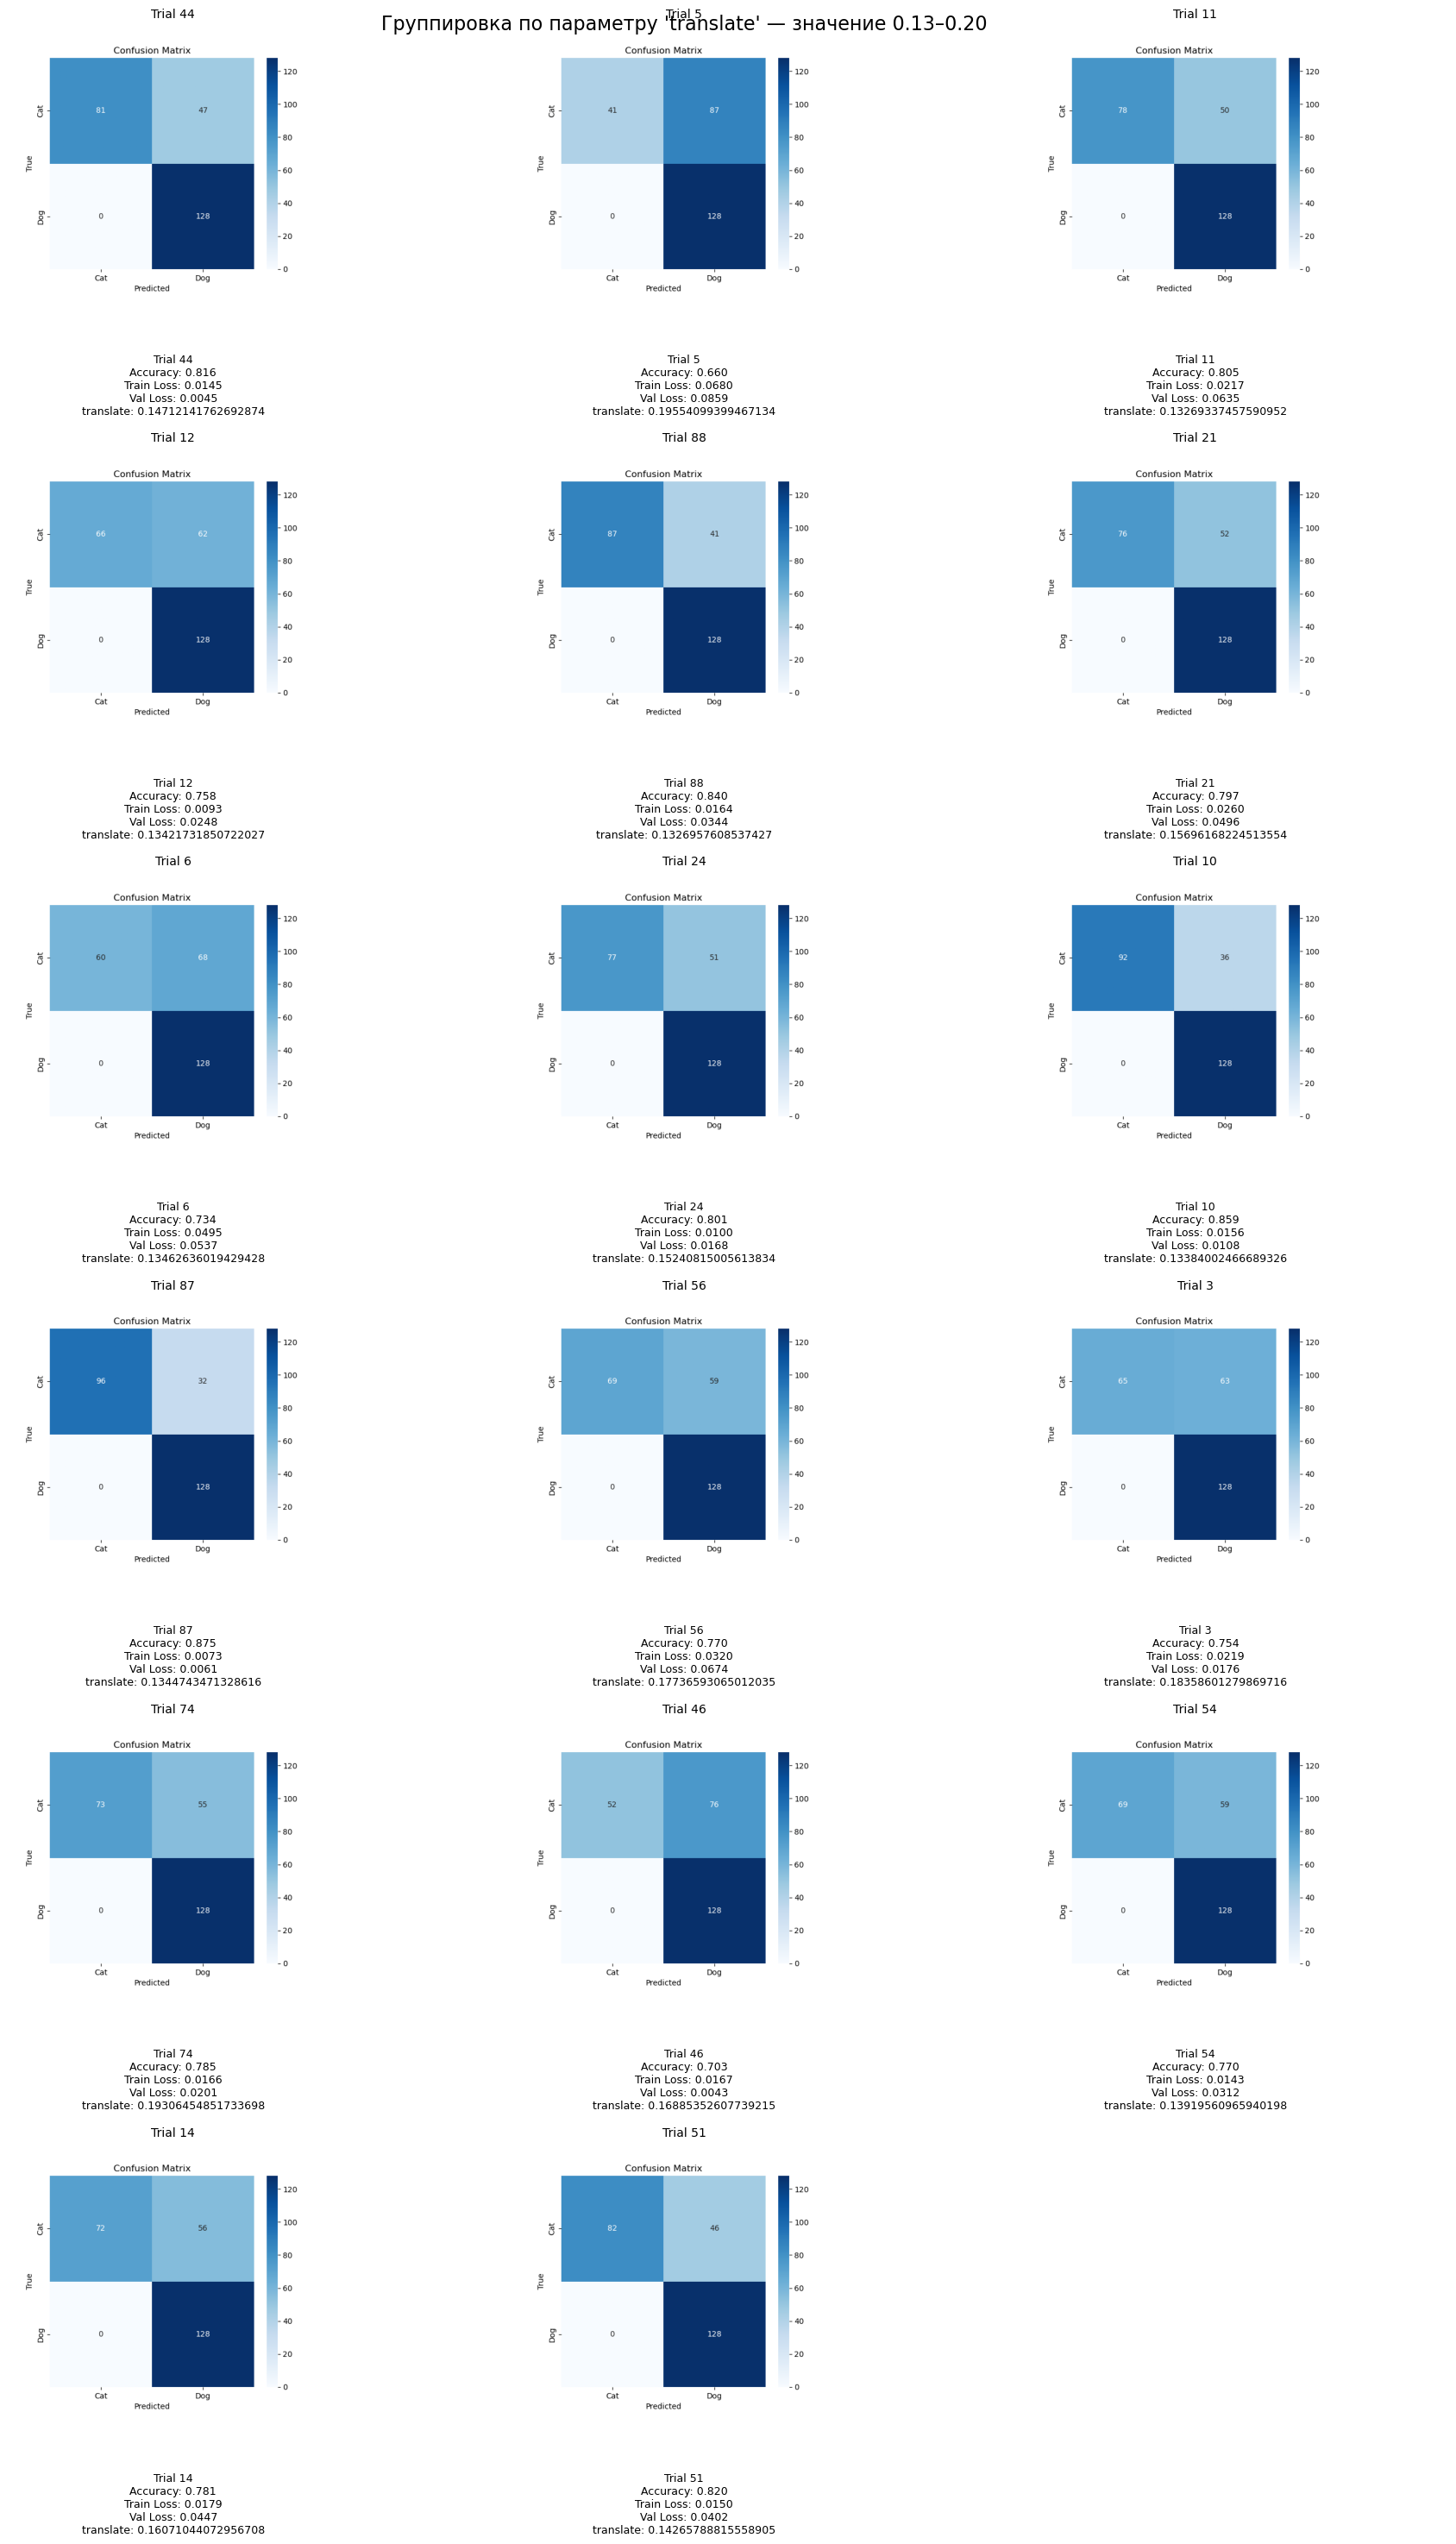

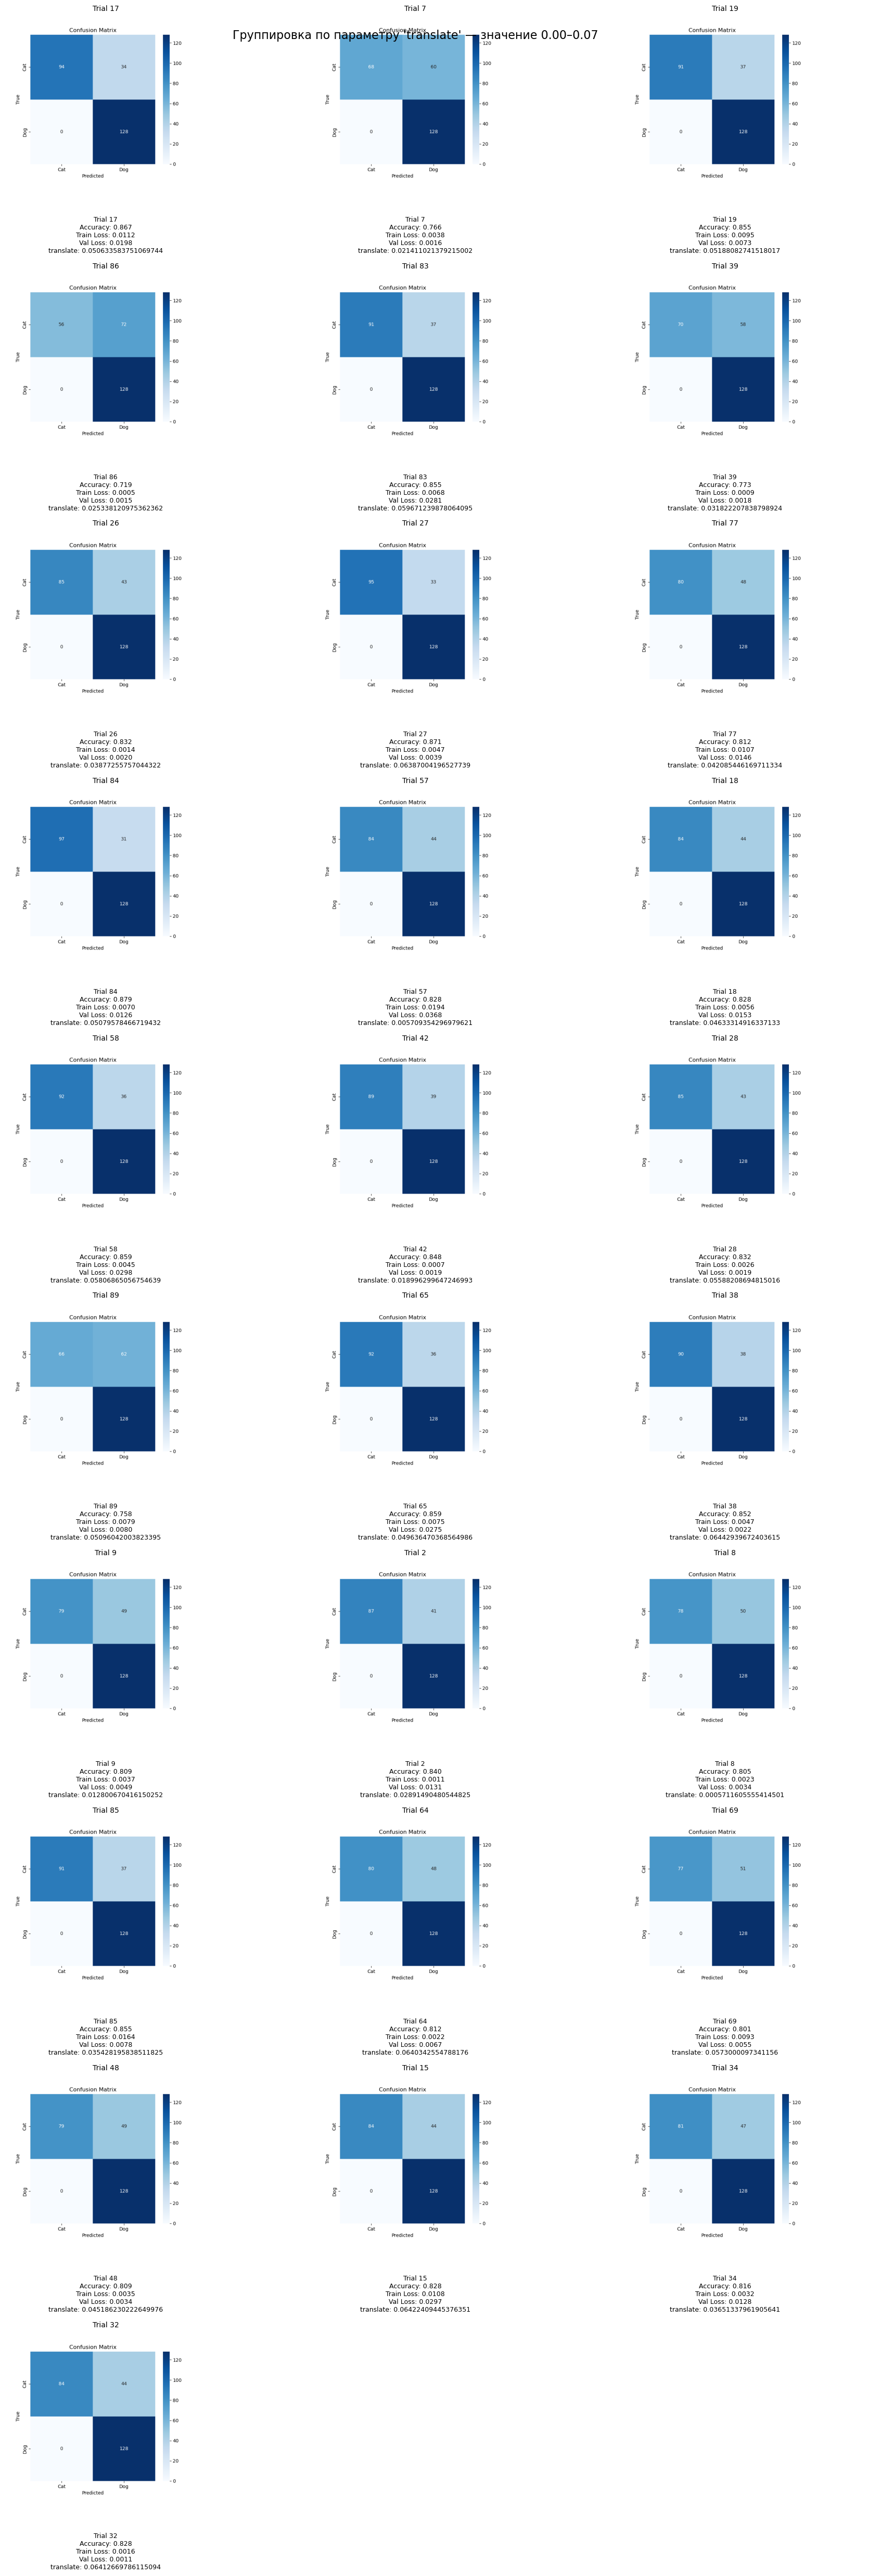

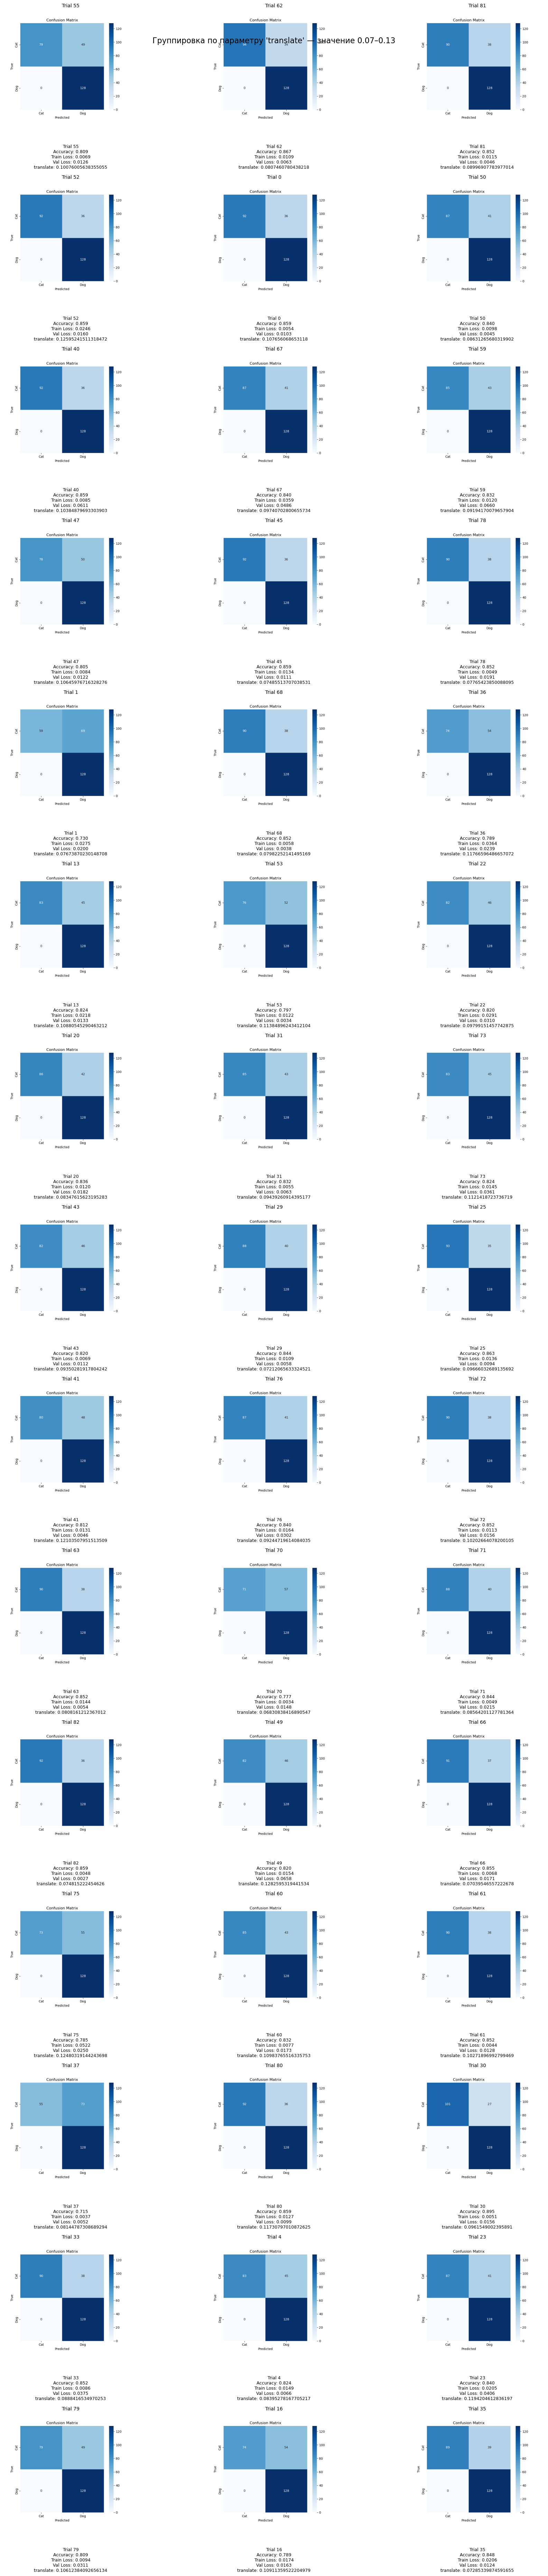

In [8]:
plot_grouped_by_param("translate")


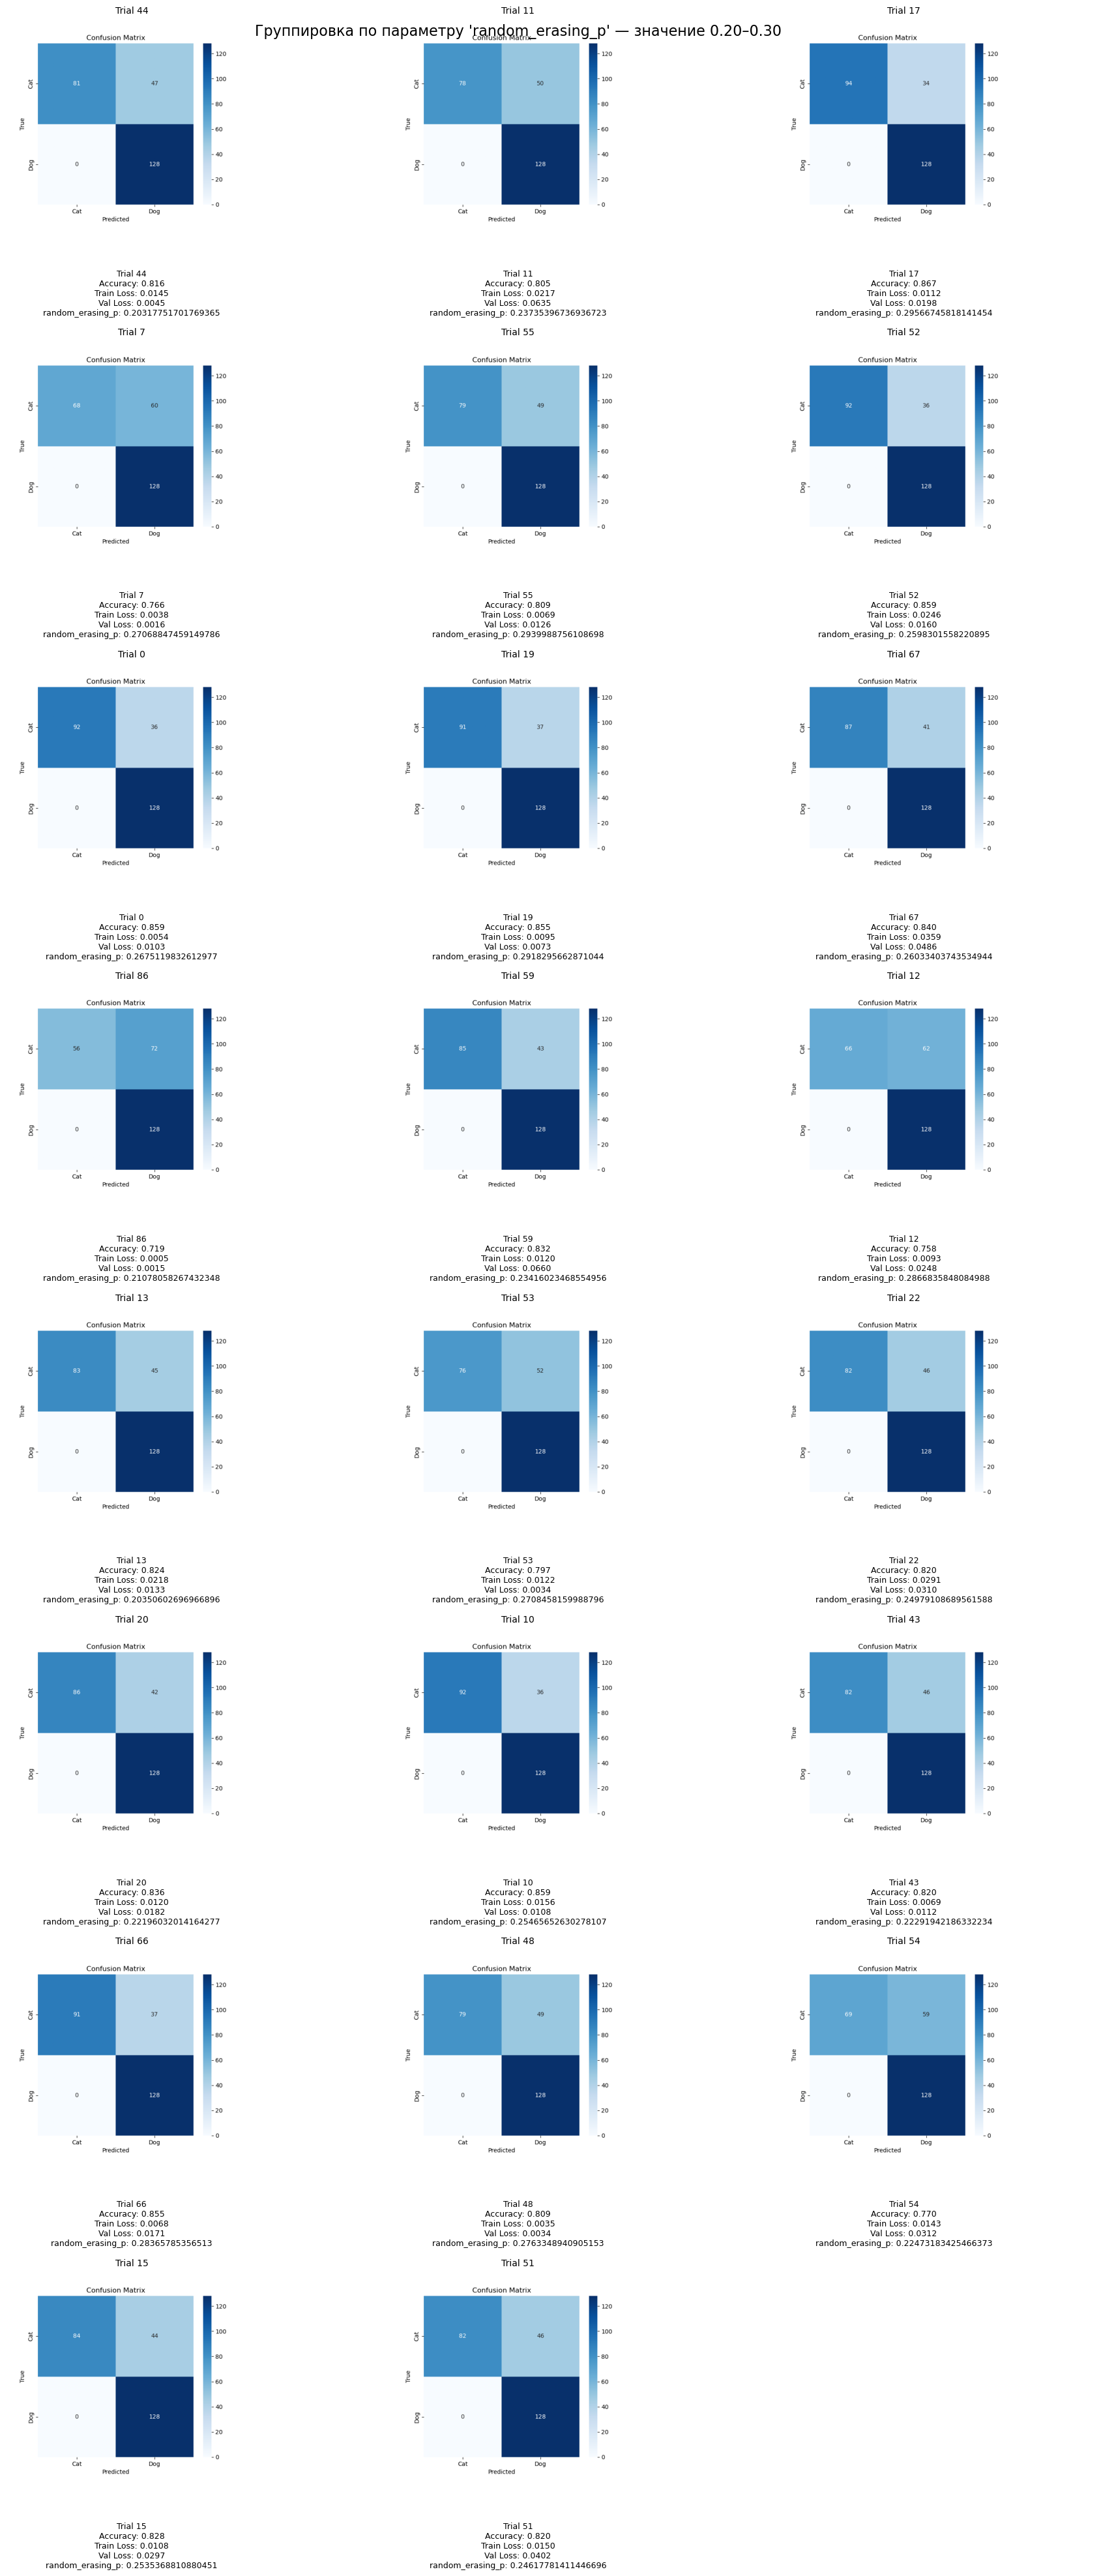

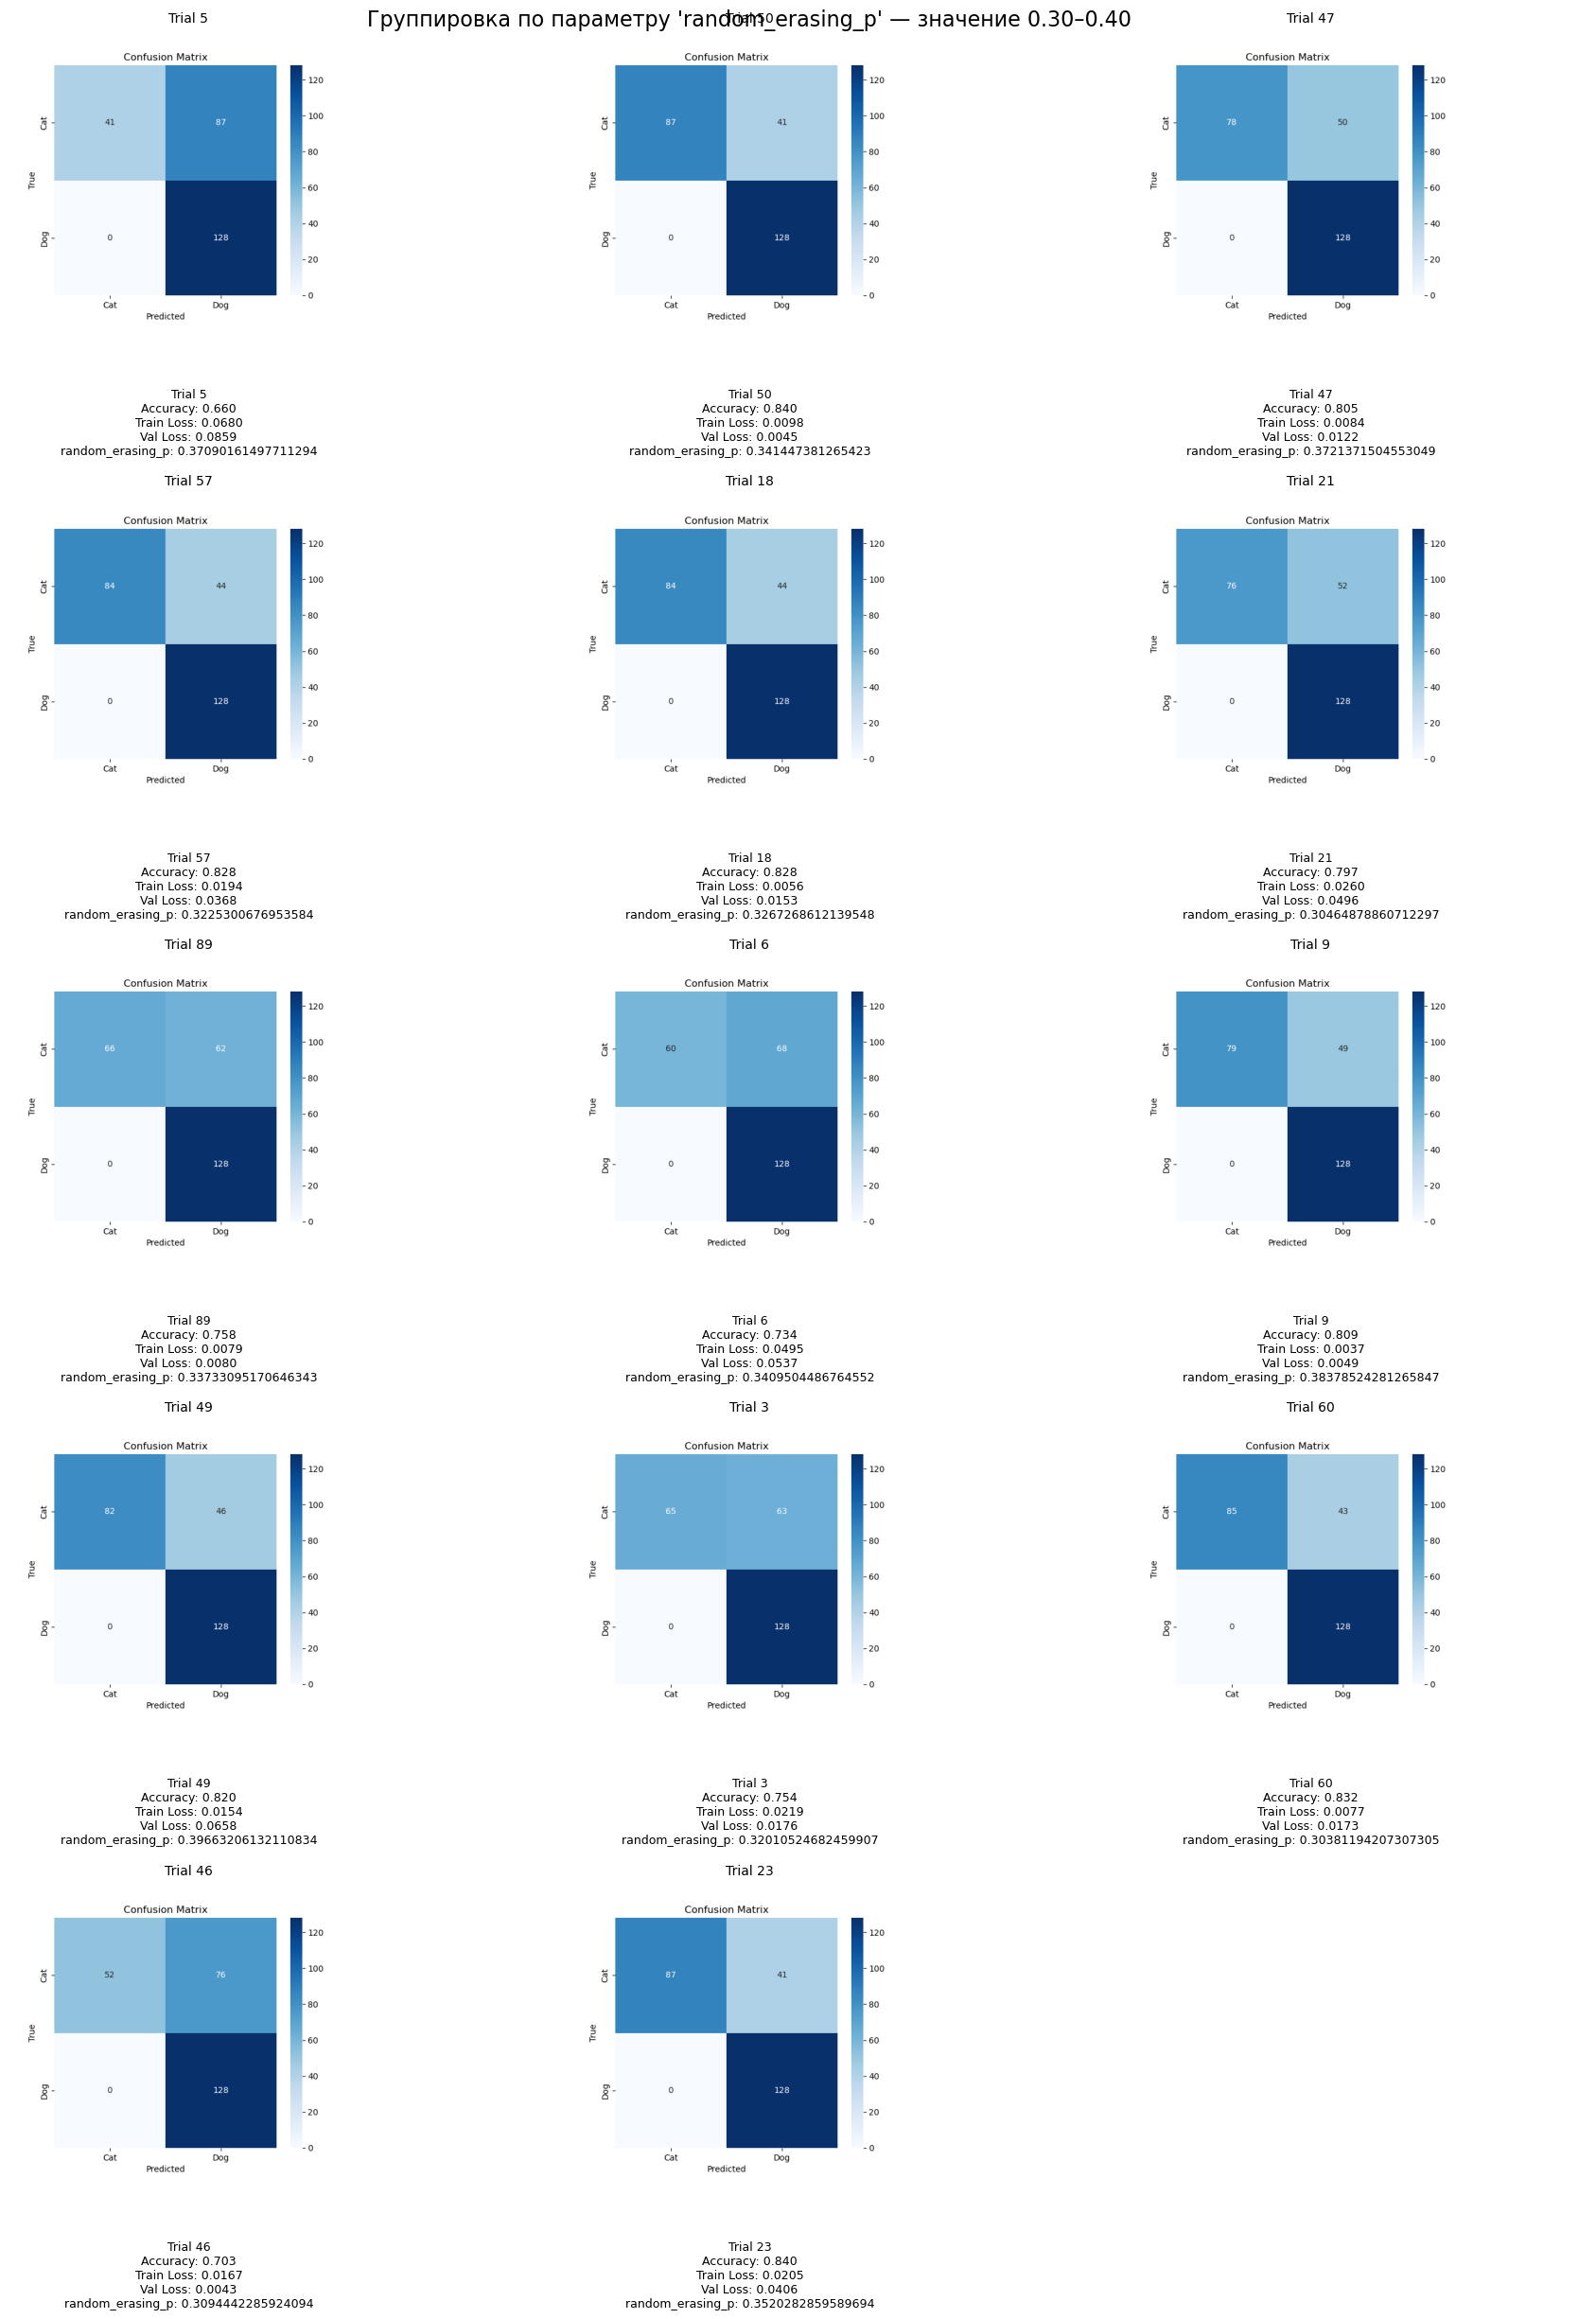

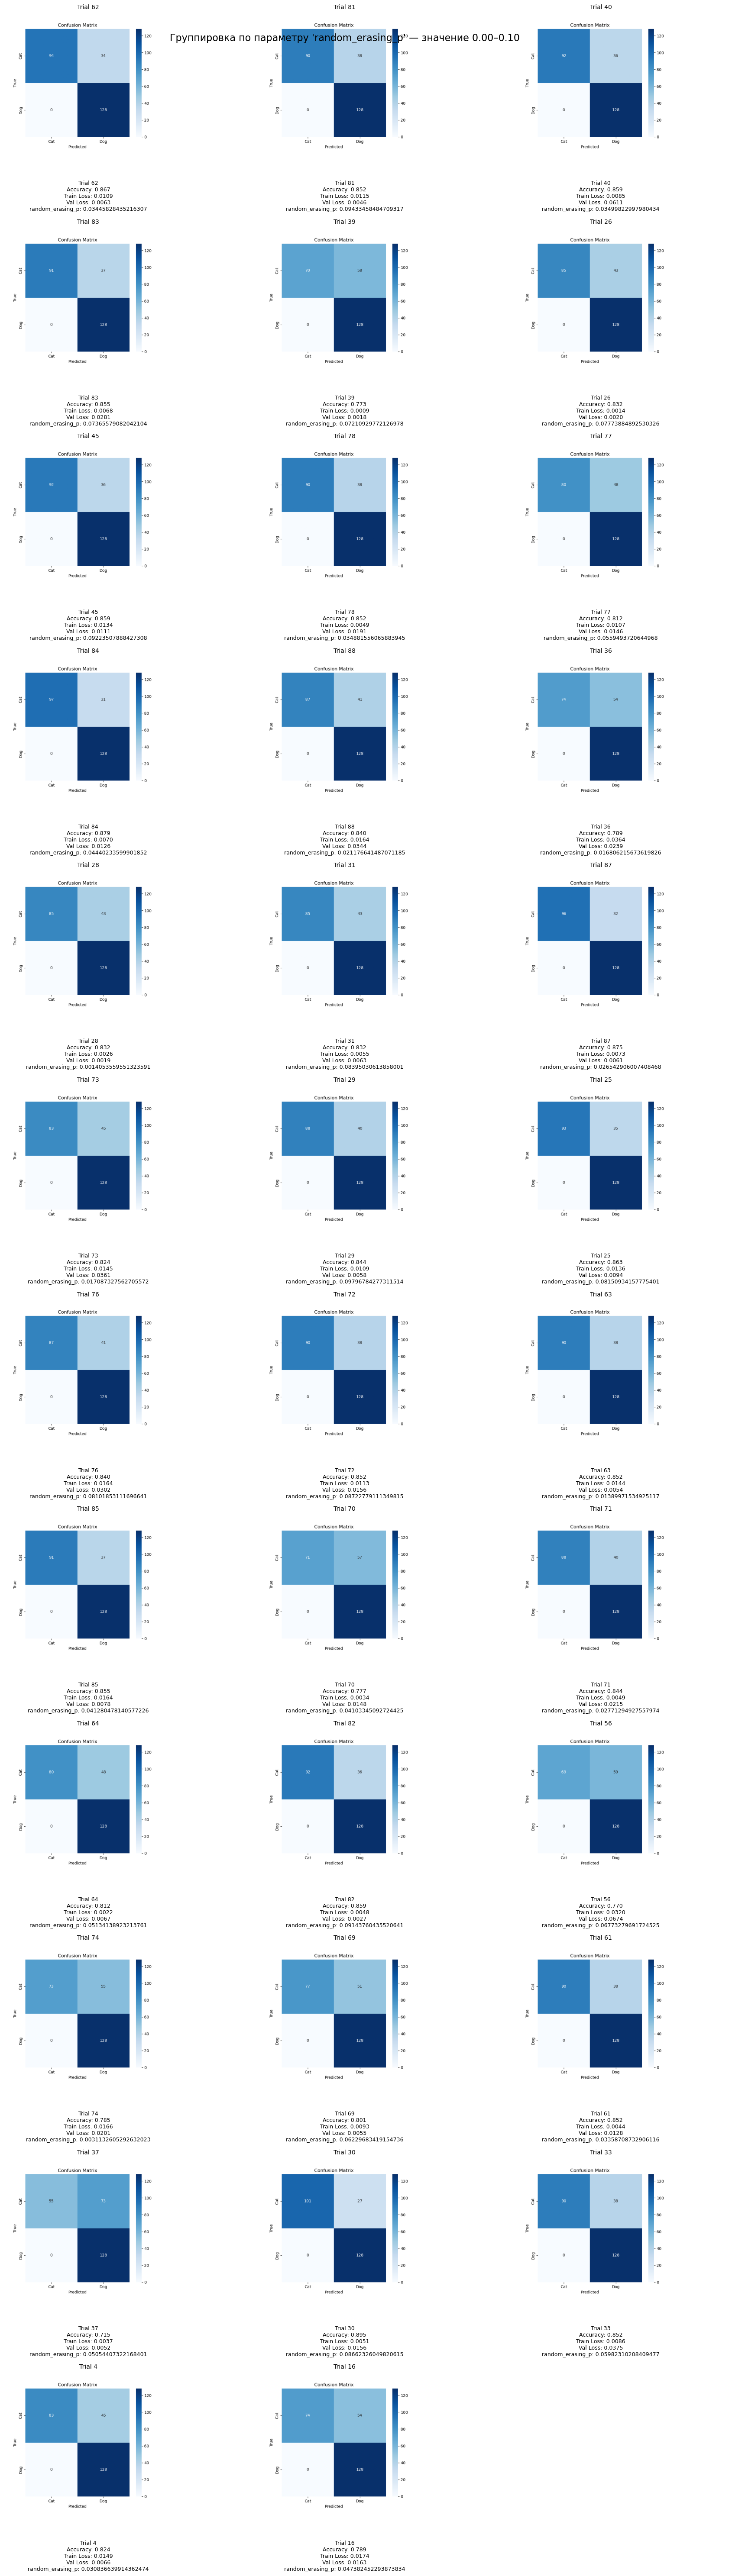

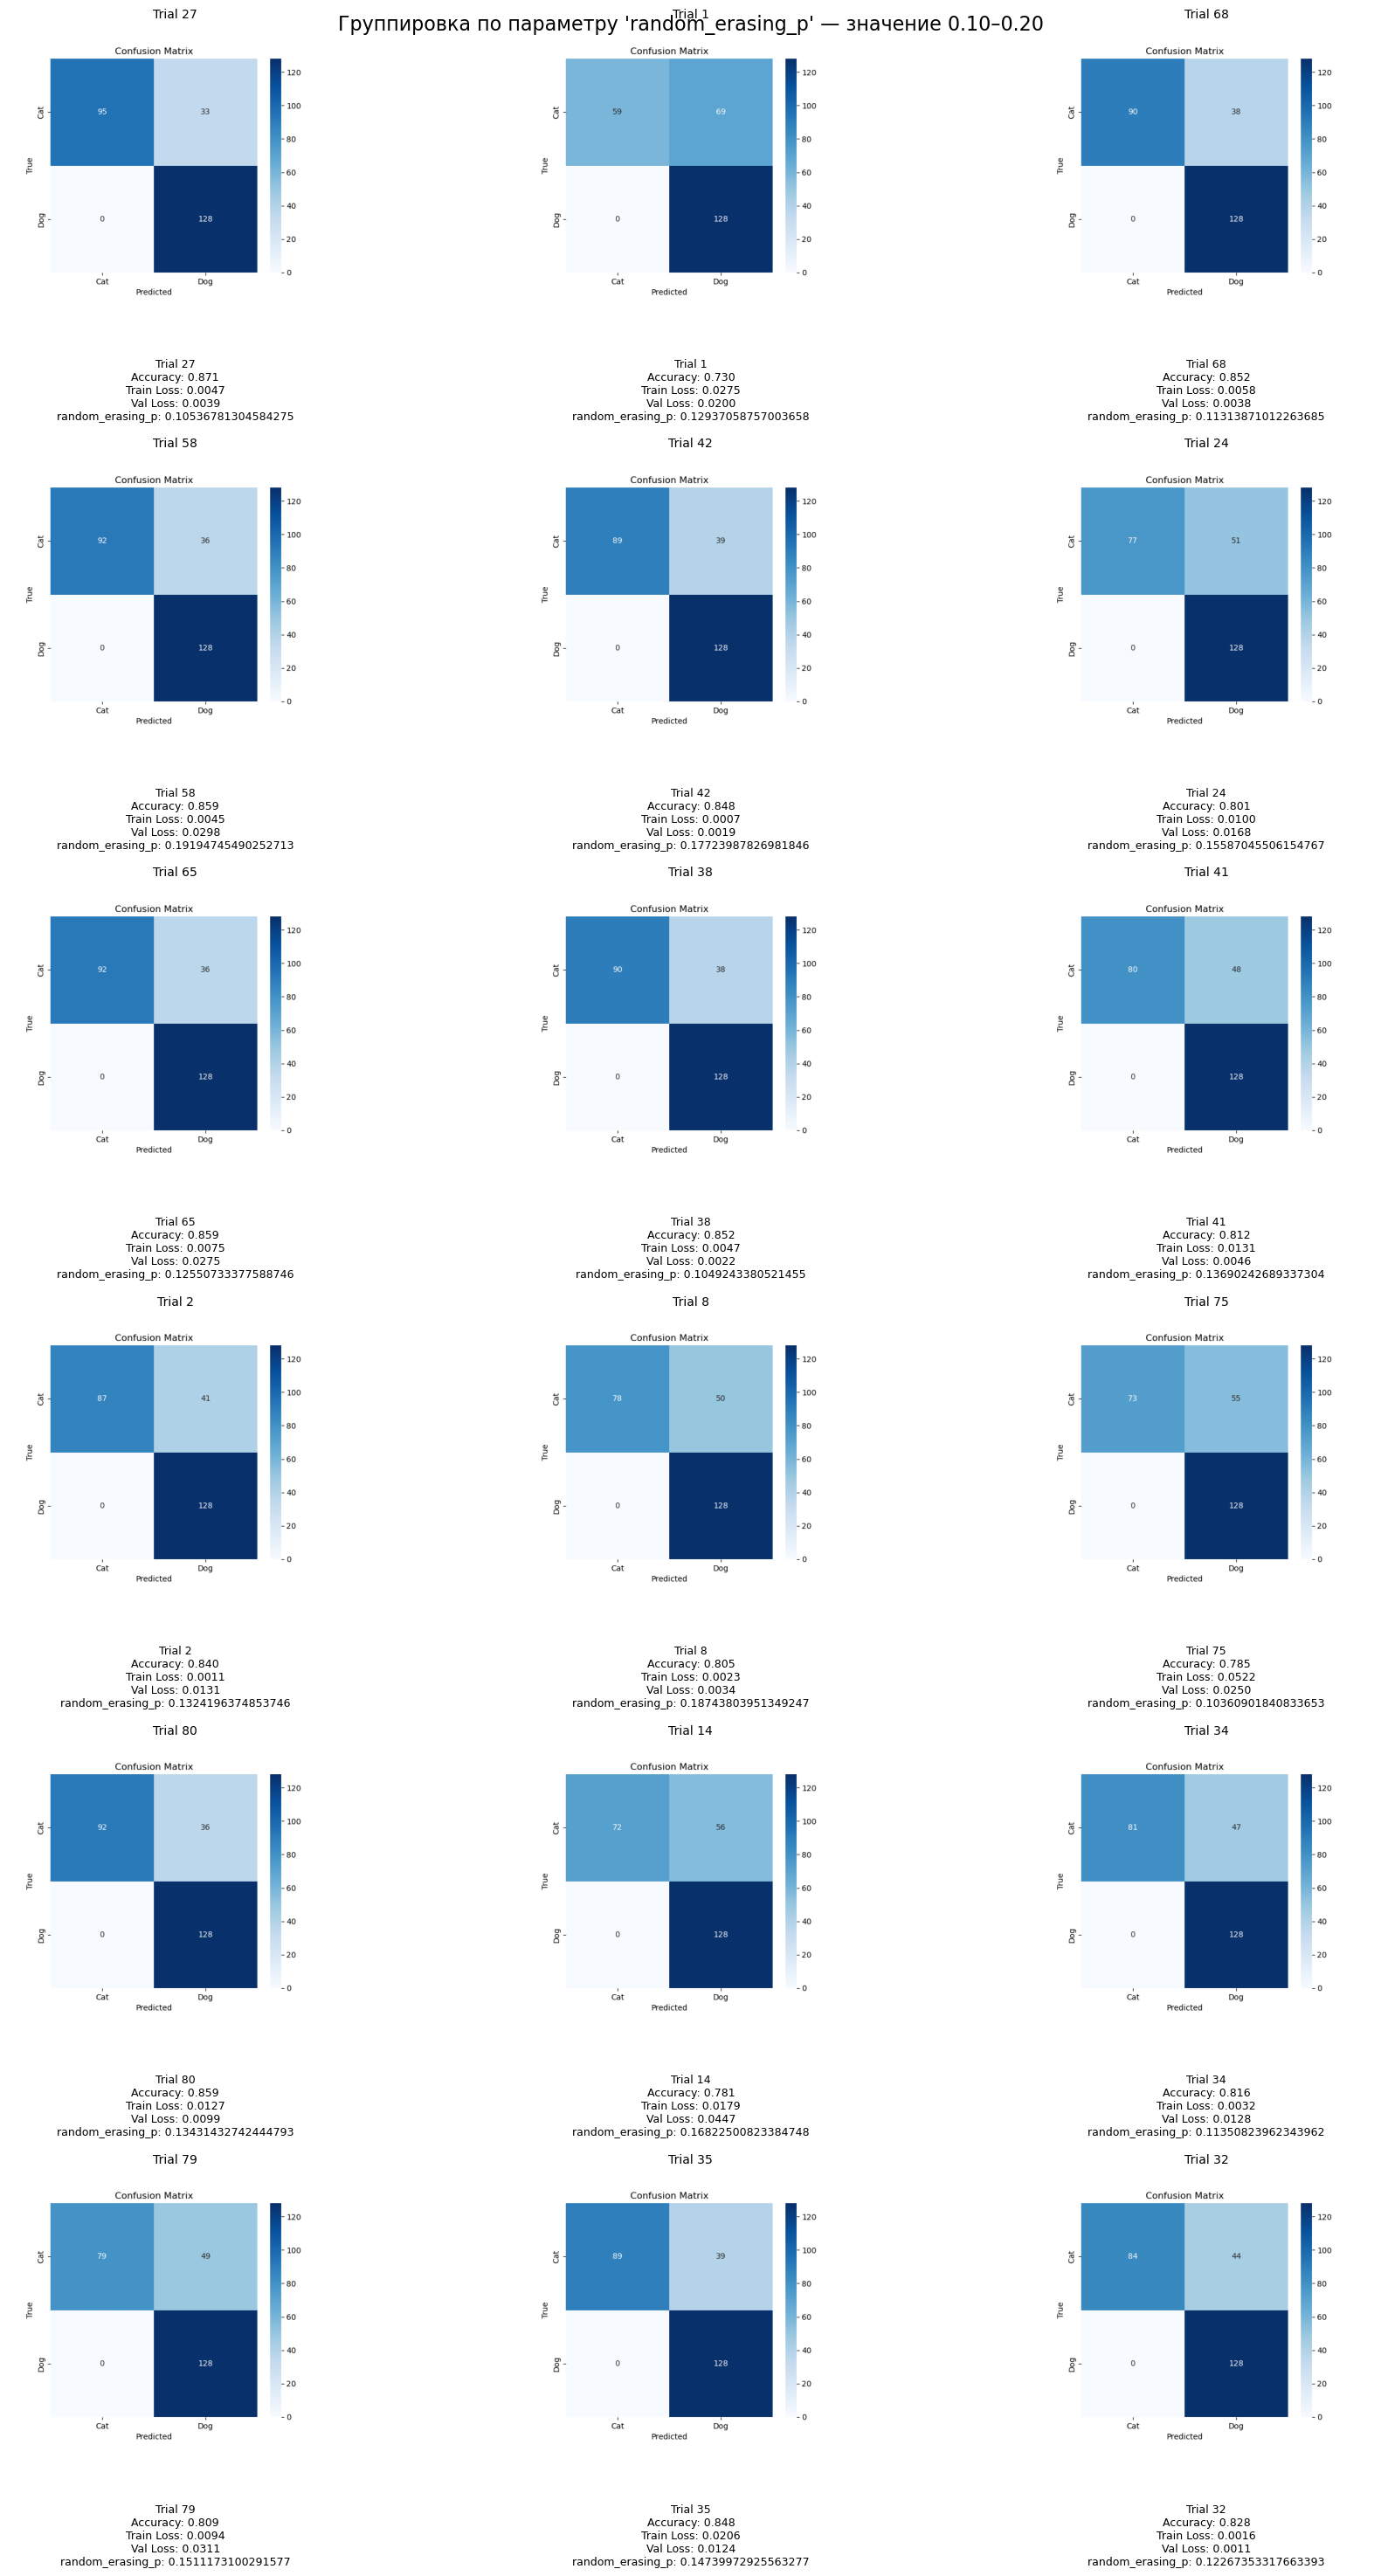

In [9]:
plot_grouped_by_param("random_erasing_p", bins=4)


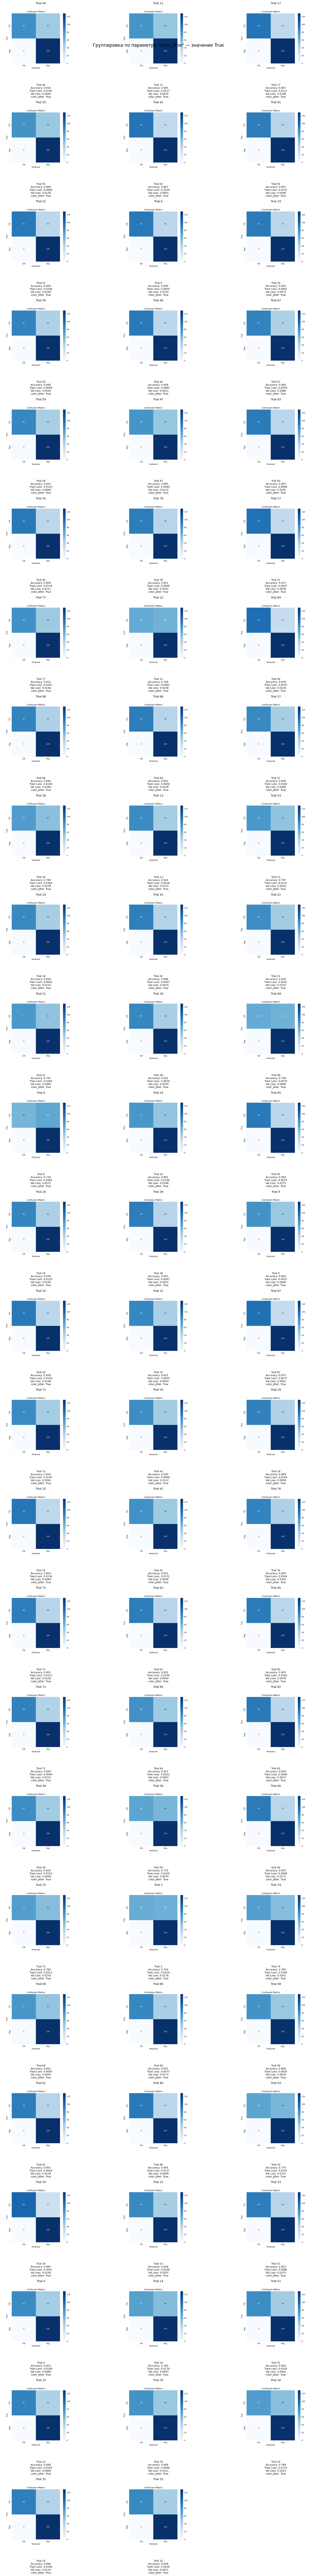

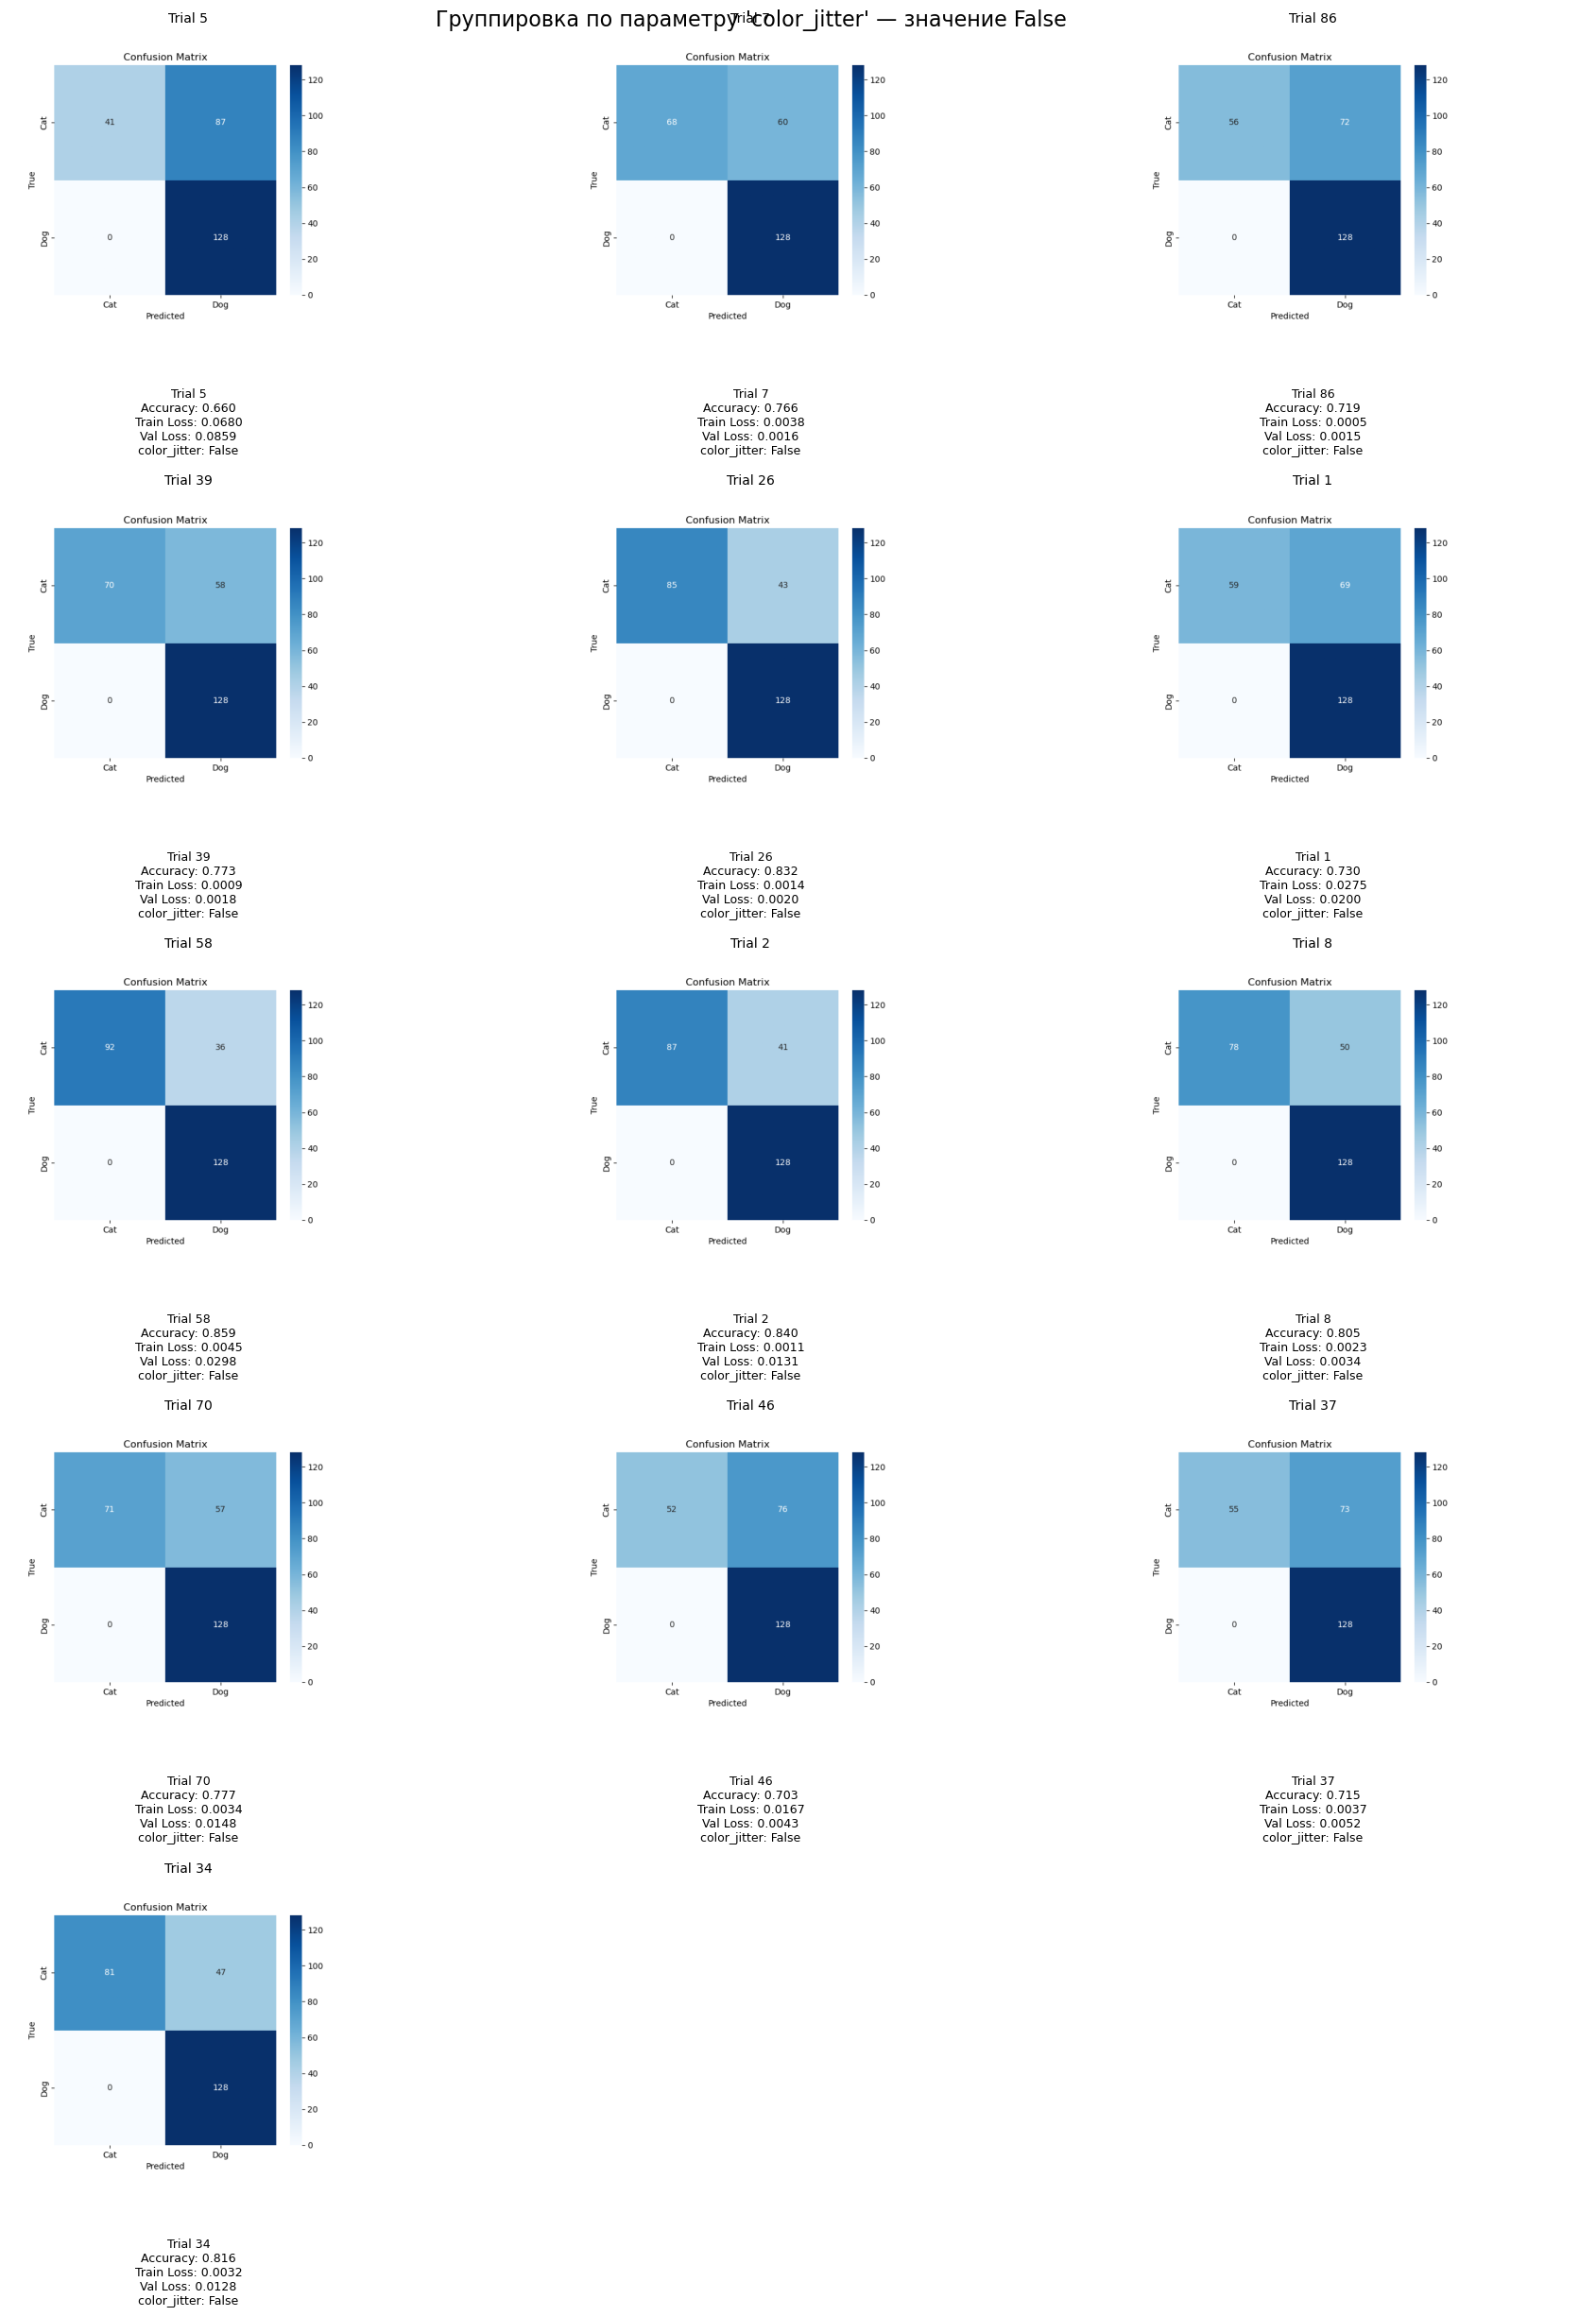

In [10]:
plot_grouped_by_param("color_jitter") 

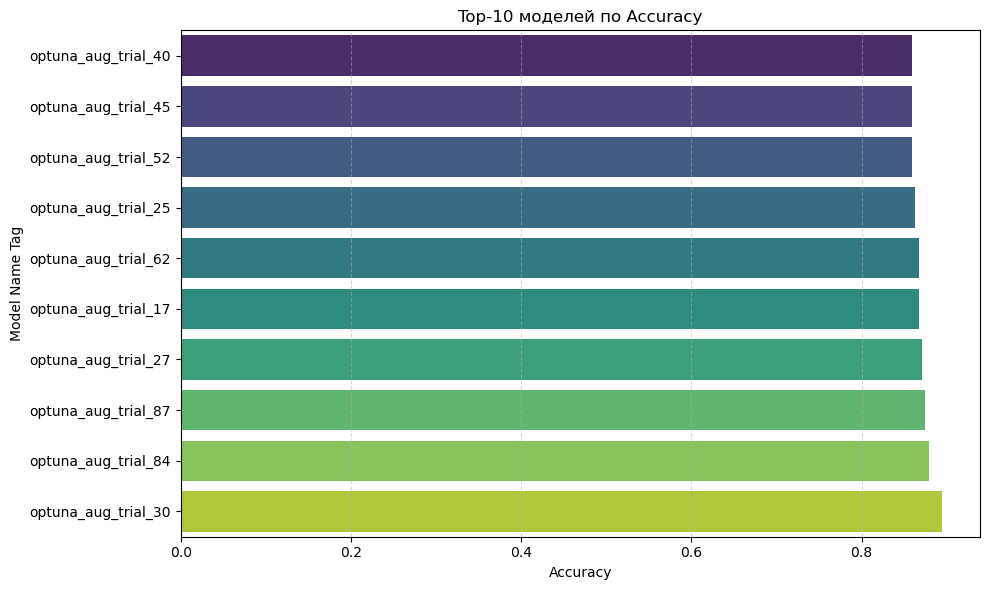

/home/saatarko/.conda/envs/HomeworkDS/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


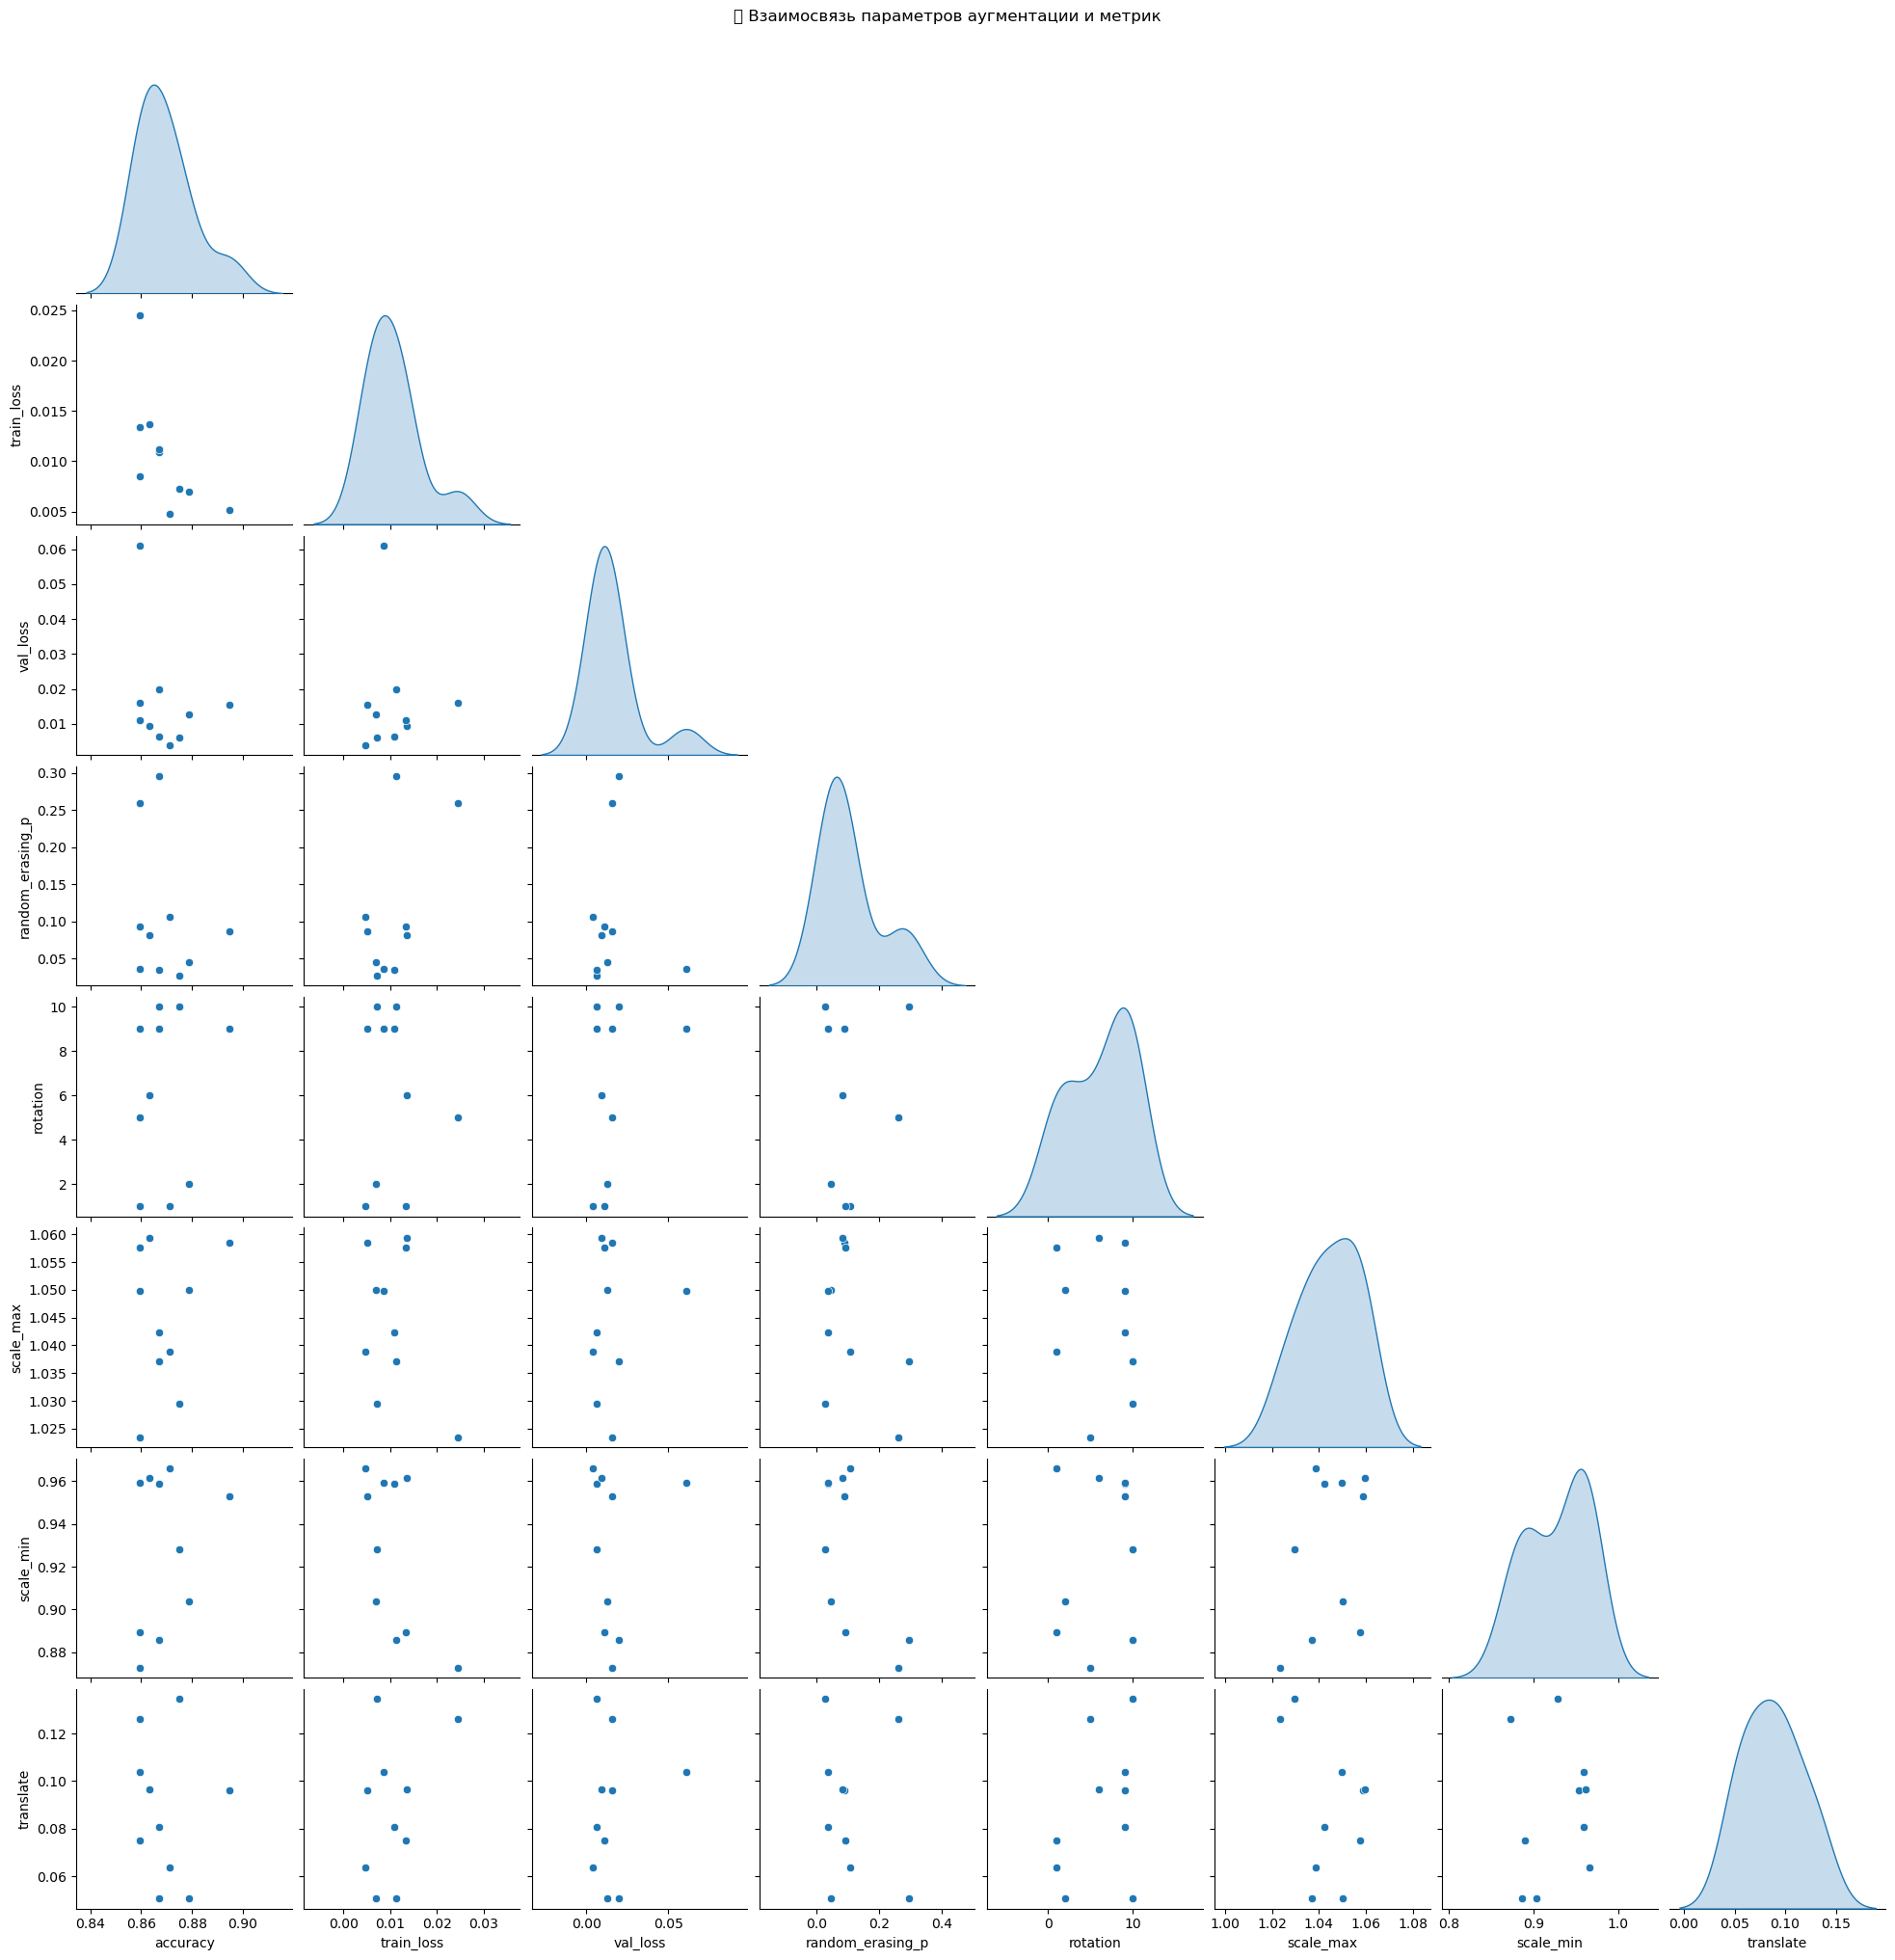

📋 Итоговая таблица (Top-10):


model_name_tag  accuracy  train_loss  val_loss  color_jitter  \
59  optuna_aug_trial_30    0.8945      0.0051    0.0156          True   
5   optuna_aug_trial_84    0.8789      0.0070    0.0126          True   
2   optuna_aug_trial_87    0.8750      0.0073    0.0061          True   
62  optuna_aug_trial_27    0.8711      0.0047    0.0039          True   
27  optuna_aug_trial_62    0.8672      0.0109    0.0063          True   
72  optuna_aug_trial_17    0.8672      0.0112    0.0198          True   
64  optuna_aug_trial_25    0.8633      0.0136    0.0094          True   
49  optuna_aug_trial_40    0.8594      0.0085    0.0611          True   
44  optuna_aug_trial_45    0.8594      0.0134    0.0111          True   
37  optuna_aug_trial_52    0.8594      0.0246    0.0160          True   

    random_erasing_p  rotation  scale_max  scale_min  translate  
59            0.0866         9     1.0586     0.9531     0.0962  
5             0.0444         2     1.0500     0.9037     0.0508  
2             0.0265        10     1.0295     0.9283     0.1345  
62            0.1054         1     1.0388     0.9659     0.0639  
27            0.0345         9     1.0424     0.9586     0.0807  
72            0.2957        10     1.0371     0.8857     0.0506  
64            0.0815         6     1.0594     0.9616     0.0967  
49            0.0350         9     1.0497     0.9593     0.1038  
44            0.0922         1     1.0576     0.8892     0.0749  
37            0.2598         5     1.0235     0.8727     0.1260

In [27]:
# === 1. Barplot: Accuracy моделей ===
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10.sort_values('accuracy'),
            x='accuracy', y='model_name_tag', hue='model_name_tag',
            palette='viridis', legend=False)
plt.title("Top-10 моделей по Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model Name Tag")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === 2. Pairplot по параметрам и метрикам ===
plot_cols = ['accuracy', 'train_loss', 'val_loss',
             'random_erasing_p', 'rotation', 'scale_max', 'scale_min', 'translate']
sns.pairplot(top_10[plot_cols], corner=True, diag_kind='kde')
plt.suptitle("📊 Взаимосвязь параметров аугментации и метрик", y=1.02)
plt.show()

# === 3. Таблица для финального отчёта (отформатированная) ===
report_table = top_10[['model_name_tag', 'accuracy', 'train_loss', 'val_loss',
                       'color_jitter', 'random_erasing_p', 'rotation',
                       'scale_max', 'scale_min', 'translate']]

# Сортируем по accuracy и округляем значения
report_table = report_table.sort_values(by='accuracy', ascending=False)
report_table = report_table.round(4)

print("📋 Итоговая таблица (Top-10):")
display(report_table)

### 📌 Ключевые выводы из top-10 аугментированных моделей:
🎯 Общие показатели:
Accuracy в топ-10 колеблется от 0.859 до 0.895, что указывает на стабильность решений при оптимальных параметрах.
Train loss и val loss также остаются в разумных пределах, без явных признаков переобучения у лучших моделей.

🔍 наблюдения по параметрам:
Color Jitter: Активен (True) у всех моделей в top-10. Это говорит о высоком вкладе цветовых искажений в обобщающую способность модели.
Random Erasing (random_erasing_p):
В топе встречаются значения от 0.02 до 0.11. Это указывает на то, что небольшие вероятности стирания (5–10%) положительно влияют на устойчивость модели к шуму.

Rotation:
Лучшие модели использовали поворот на 1–10°, особенно часто ~9–10°. Это говорит о том, что легкий поворот помогает, но чрезмерный — вероятно, ухудшает качество.
Scale (масштабирование):
scale_max: чаще всего 1.03–1.06 — небольшое увеличение объектов.
scale_min: держится в диапазоне 0.88–0.96 — лёгкое уменьшение.
👉 Это указывает, что симметричное масштабирование ±5–10% — полезно.

Translate (сдвиг):
Используемые значения в пределах 0.05–0.13, то есть умеренный сдвиг. В топе нет экстремальных значений, значит слишком сильные сдвиги скорее вредят.

📈 Итого:
Наиболее эффективной оказалась комбинация умеренного color_jitter, лёгкого rotation (~9–10°), масштабирования на ±5–10%, и небольшого random_erasing_p (~0.05–0.10). Такие аугментации обеспечили лучшую обобщающую способность без необходимости сильных регуляризаторов.